In [1]:
## only for jupyter notebooks
%matplotlib inline 
##load the pipeline
from src.ExpoSeq.pipeline import PlotManager
# Note: the figures will appear differently in the notebook compared to your python console for which the pipeline was designed.

In [2]:


plot = PlotManager(test_version = True,
                   test_exp_num = 10,
                   test_panrou_num=2) # this part is only for test purposes, normally you would just call: plot = PlotManager() . Here, you just generate a random dataset to test the plotting functions
# Note: The dataset is purely sampled here, so the sequences are not typical HCDR3 sequences. This is just for testing purposes.




-----------------------
General Instructions
-----------------------
All plots can be called with 'plot' followed by the name of the plot, separated by a dot.
To analyze a specific sample or investigate possible options, use 'help()' and 'plot' followed by the name of the plot.

-----------------------
Important Variables
-----------------------

- plot.sequencing_report 
    Contains the processed and trimmed NGS data.
- plot.binding_data
    Contains the uploaded binding data.
- plot.Report.origin_seq_report
    Contains the raw NGS data from mixcr which is not trimmed.
- plot.ControlFigure.fig
    Is the matplotlib figure object
- plot.ControlFigure.ax
    Is the matplotlib axis object
- plot.alignment_report
    A dataframe which contains the data from all alignment reports.

-----------------------
Plot Commands
-----------------------
- plot.alignment_quality(): 
    Creates a figure showing the Overall Reads per sample and the number of aligned reads.

- plot.aa_distribution()

In [3]:
plot.print_samples() # identify the names of your samples
plot.print_antigens() # identify the names of your antigens

my_report = plot.sequencing_report# you can analyze your sequencing data yourself by taking the sequencing_report, which contains the collected information from mixcr, from the plot manager.
my_report.head(10)
my_report.to_csv("my_report.csv") # you can also save it as a csv file

['sample 0', 'sample 0 round 2', 'sample 1', 'sample 1 round 2', 'sample 2', 'sample 2 round 2', 'sample 3', 'sample 3 round 2', 'sample 4', 'sample 4 round 2']
['Epitope 0', 'Epitope 1']


In [4]:
plot.change_preferred_sample("sample 3") # the default sample for all plots will be sample 3 then. 
plot.preferred_sample

'sample 3'

In [ ]:
plot.change_region() # asks you for the region you would like to analyze

In [6]:
plot.change_filter(length_threshold_aa = 3) # filter out reads with sequence length below 3

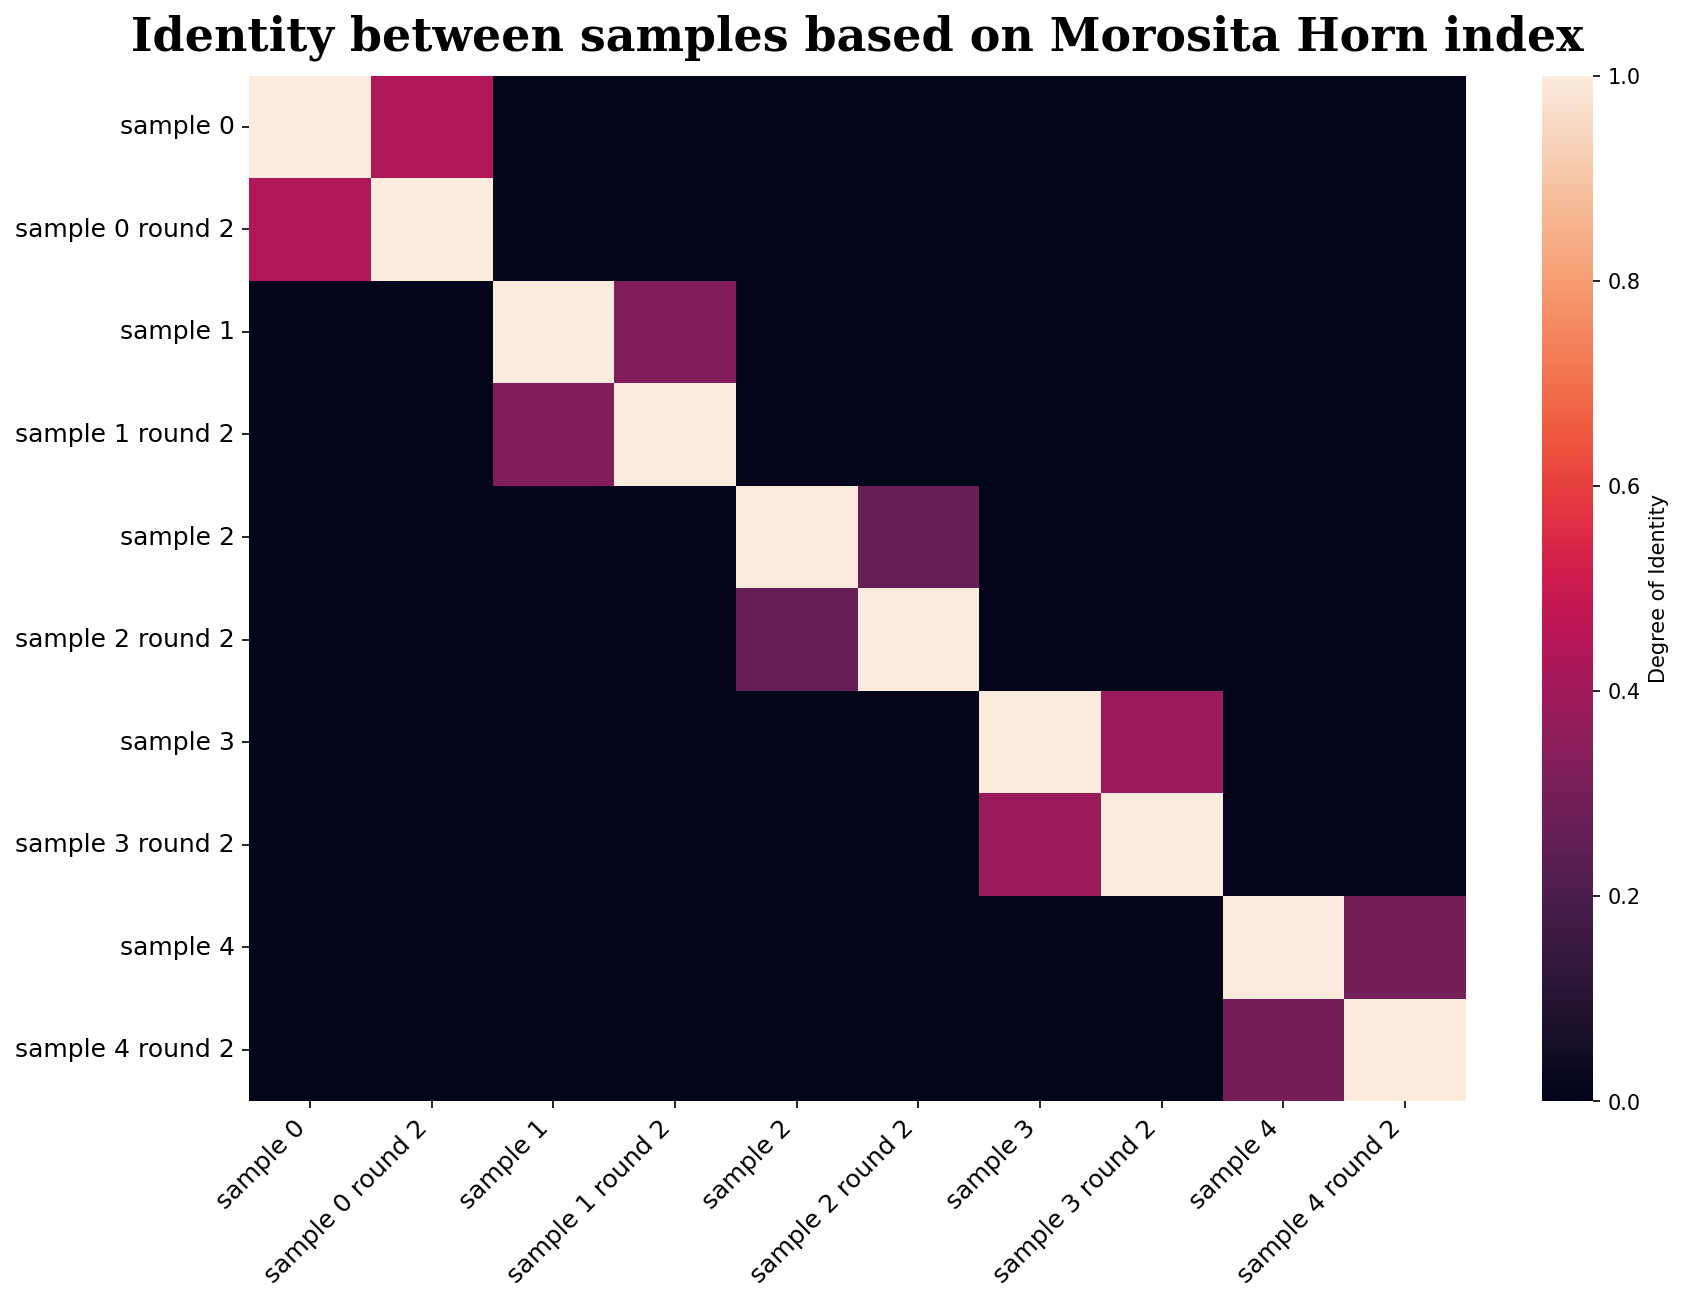

In [7]:
plot.morosita_horn() # some plots do not need any input and you can just call them like this
plot.ControlFigure.fig # not necessary when working in console


In [8]:
help(plot.morosita_horn) # get some help by calling help() on the plot you want to use

Help on method morosita_horn in module src.ExpoSeq.pipeline:

morosita_horn(annotate_cells=False, specific_experiments=False, matrix_save_path=None) method of src.ExpoSeq.pipeline.PlotManager instance
    :param annotate_cells: Default is False. If you want to see the values of the matrix, set it to True.
    :param specific_experiments: you can give a list with specific experiments
    :param matrix_save_path: Path where you want to save the matrix
    :return: Returns a matrix of the identity between your samples based on the Morosita Horn Index



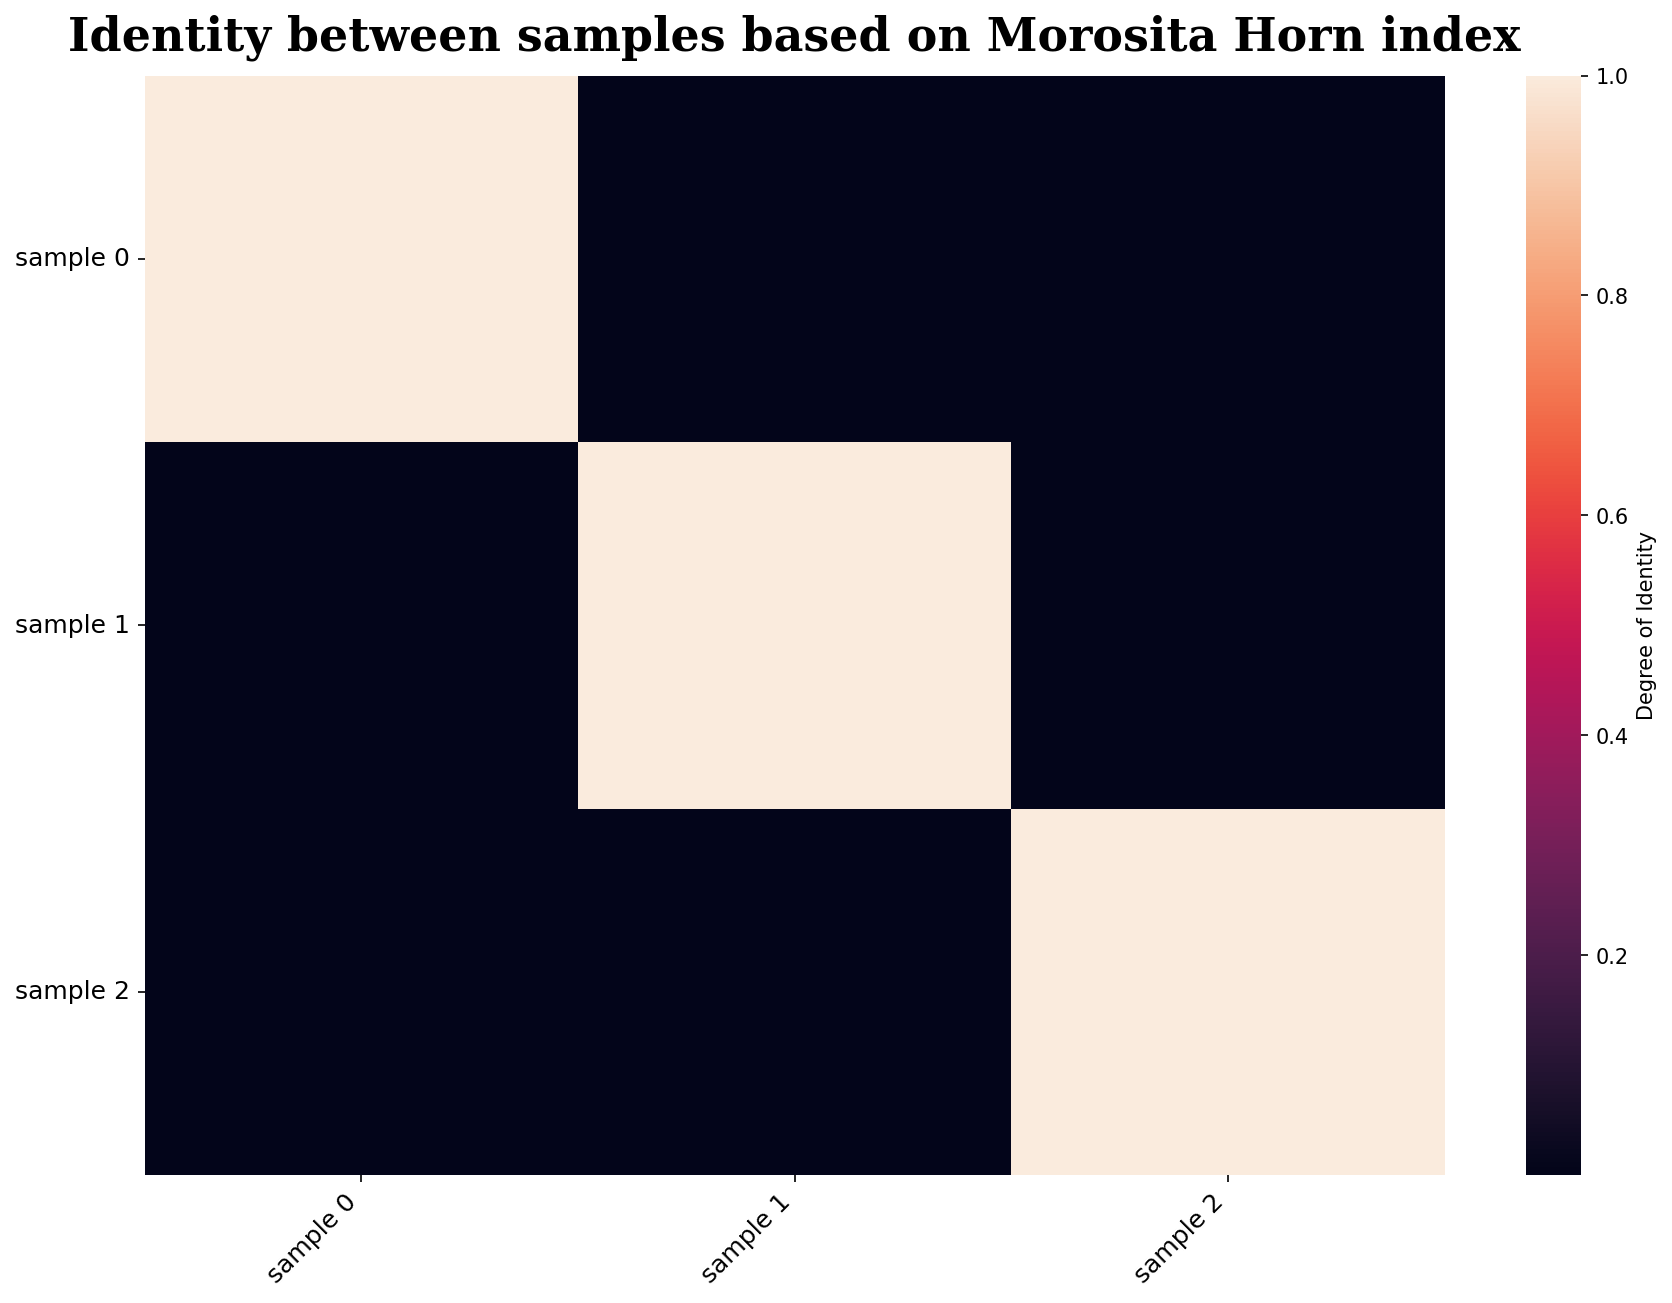

In [9]:
plot.morosita_horn(specific_experiments= ["sample 0",  'sample 1',  'sample 2',]) # help allows you to see what you can specify in your plot, for instance you can choose specific experiments
plot.ControlFigure.fig

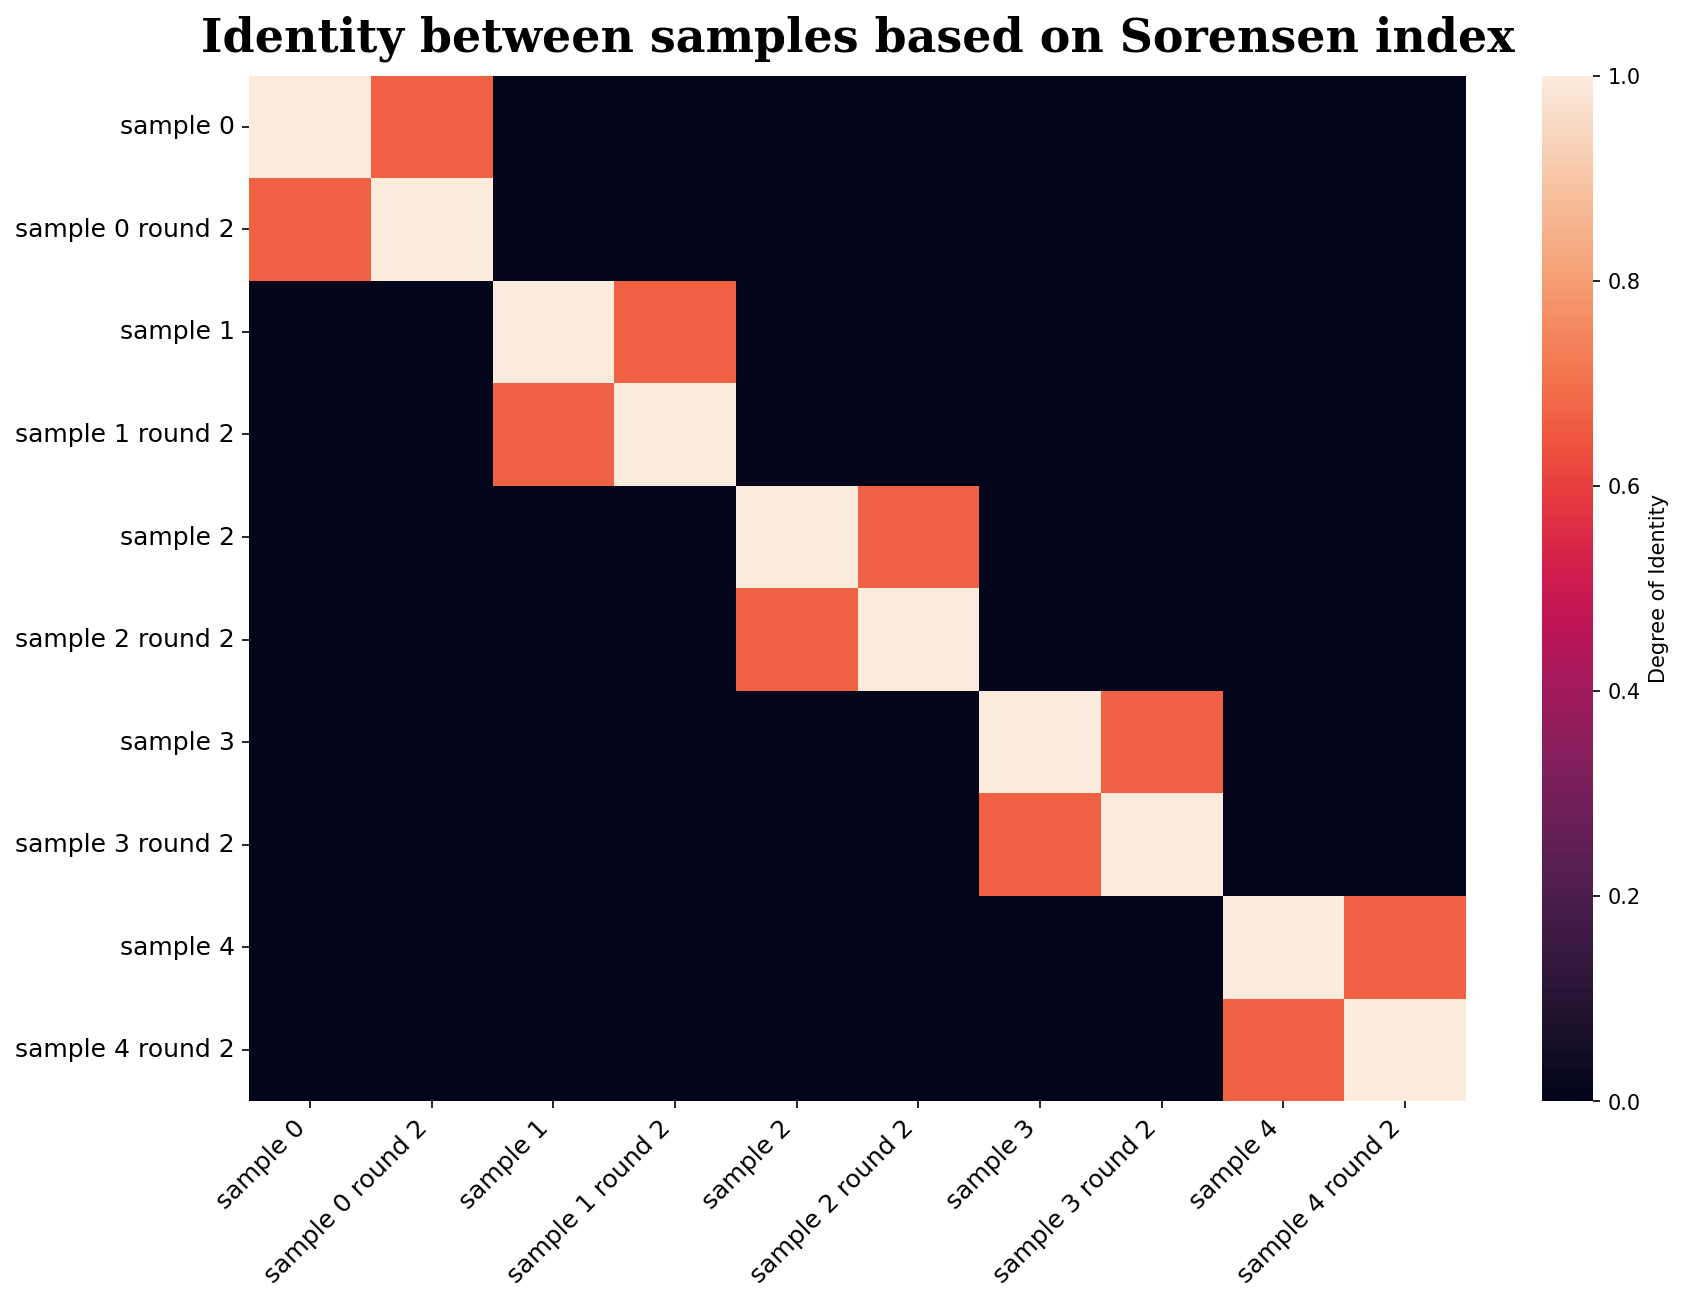

In [10]:
plot.sorensen() # calculate the identity based on the sorensen dice index
plot.ControlFigure.fig

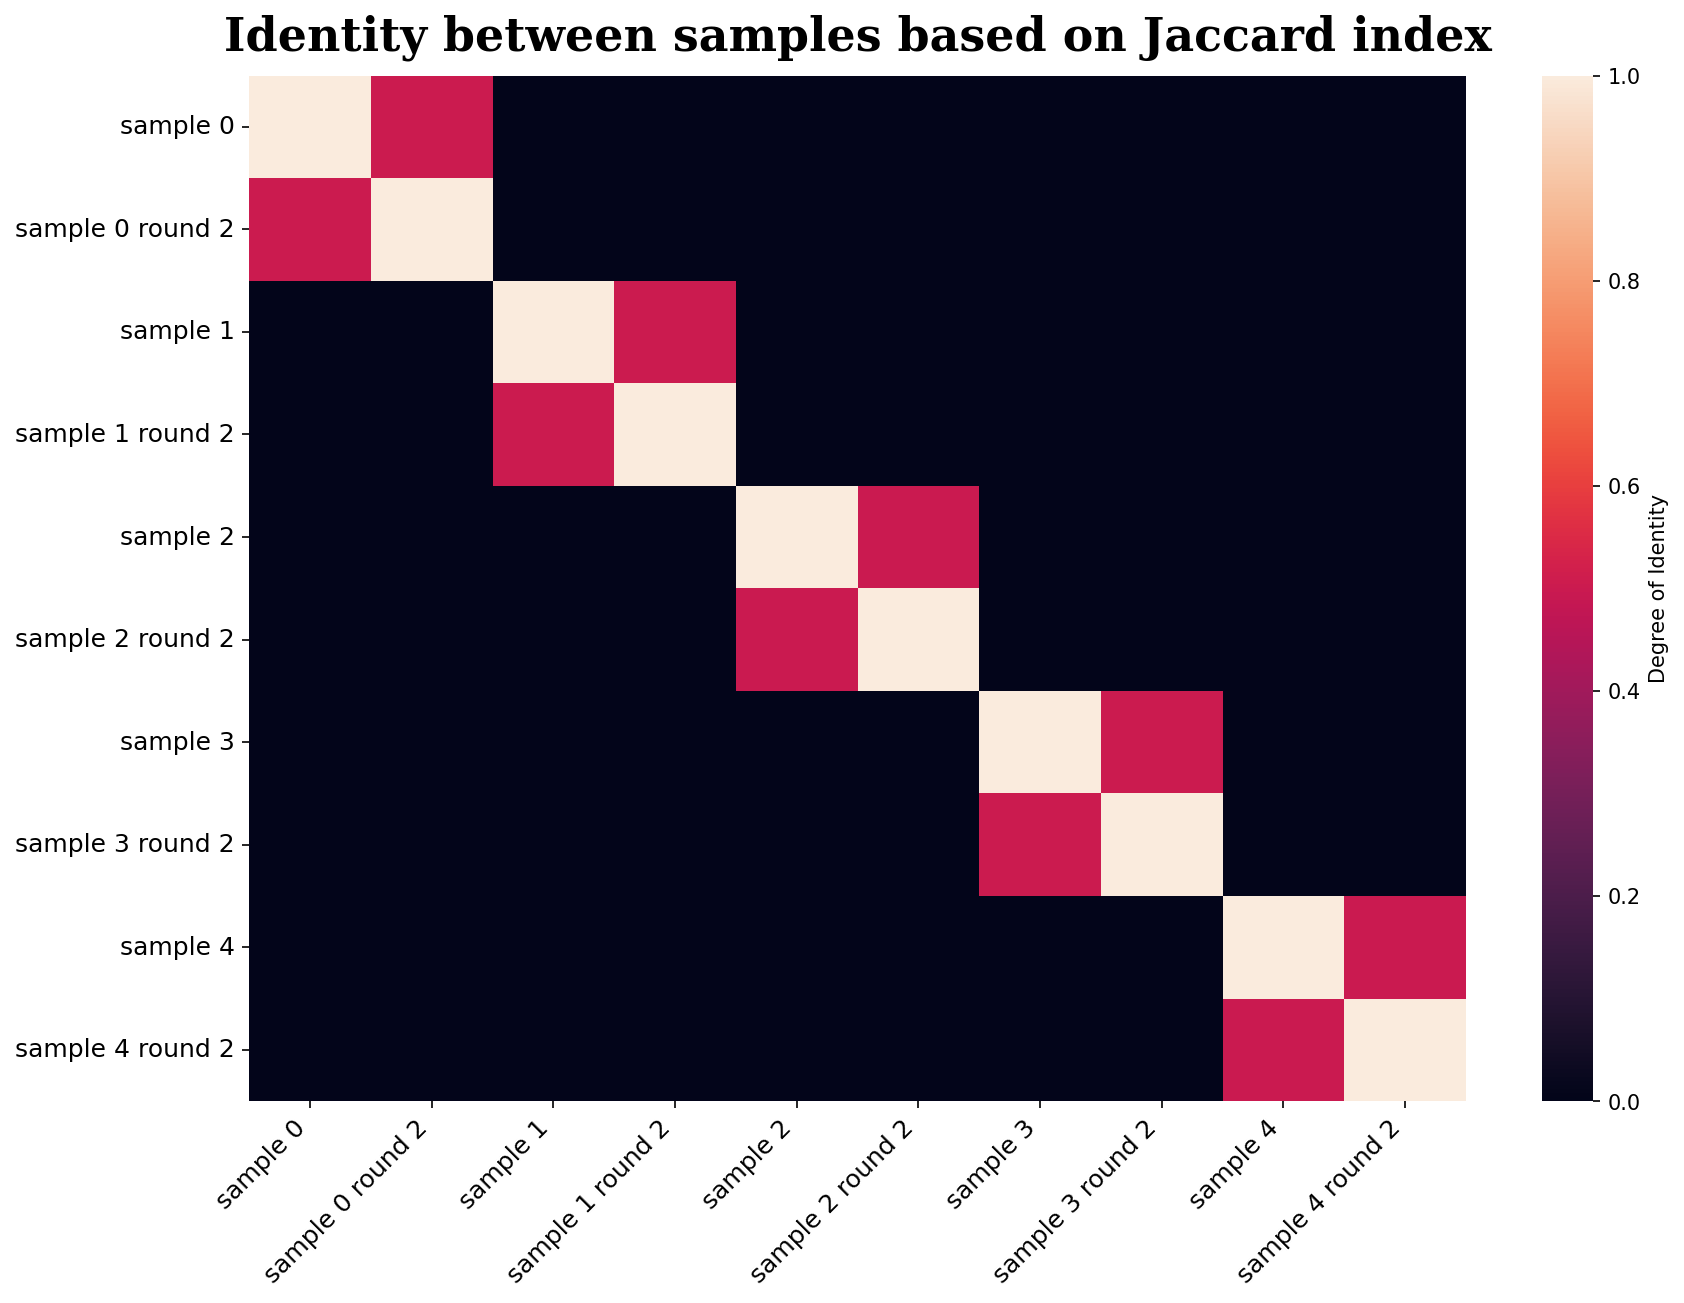

In [11]:
plot.jaccard() # calculate the identity based on the jaccard index
plot.ControlFigure.fig

In [12]:
help(plot.tsne_cluster_AG)

Help on method tsne_cluster_AG in module src.ExpoSeq.pipeline:

tsne_cluster_AG(sample=None, antigen=None, antigen_names=True, pca_components=70, perplexity=25, iterations_tsne=2500, save_report_path=None) method of src.ExpoSeq.pipeline.PlotManager instance
    :param sample: the sample you would like to analyze
    :param antigen: the toxins you would like to cluster
    :param antigen_names: Default is True. Prints the name of the toxin for the corresponding embedded sequence in the plot
    :param pca_components: optional. Default is 70
    :param perplexity: optional. Default 25
    :param iterations_tsne: optional. Default is 2500
    :return: It first embeds the sequences in a vector space and then reduces the dimensions and clusters them with PCA and TSNE. The sequences with the binding data are processed with the input sequences, to enable the plotting of the binding data.



Explained variance after reducing to 70 dimensions:0.4347525390172653


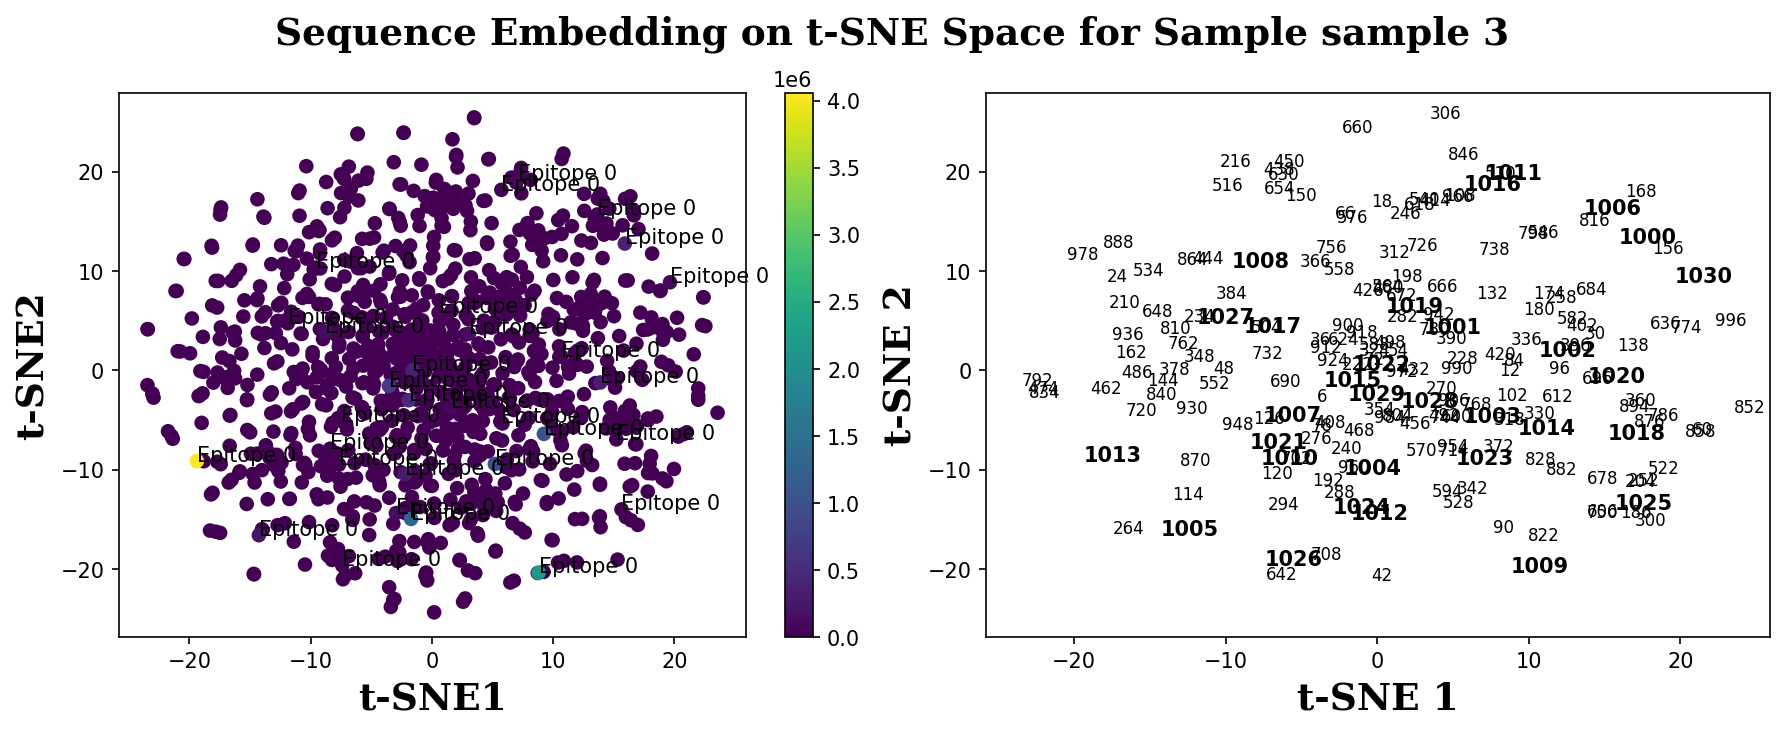

In [13]:
report = plot.tsne_cluster_AG() 
plot.ControlFigure.fig

Explained variance after reducing to 70 dimensions:0.4346873907379339


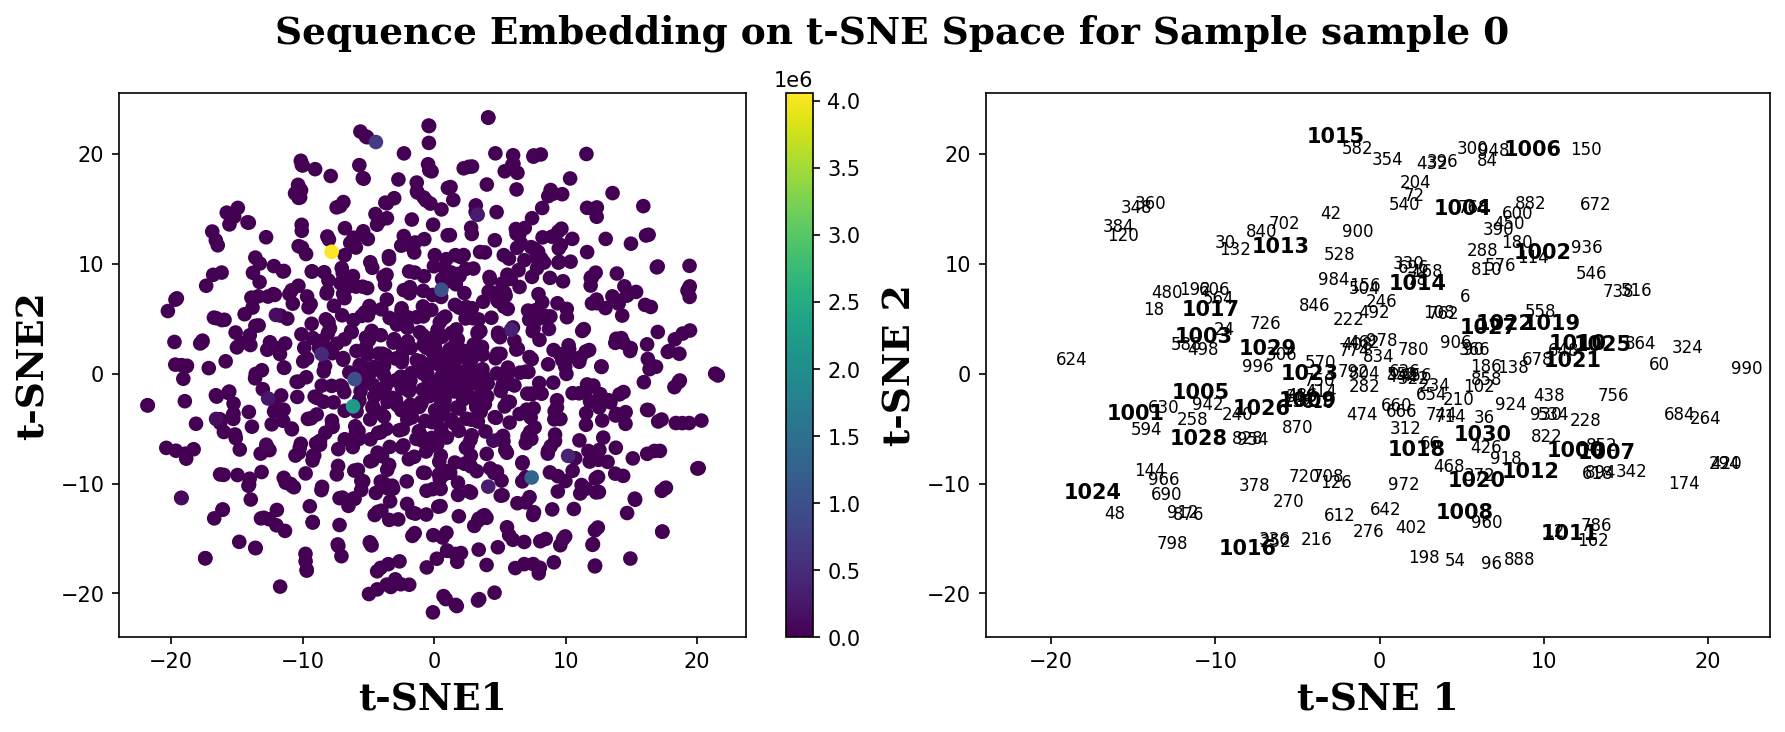

In [14]:
report = plot.tsne_cluster_AG("sample 0", ["Epitope 0"], antigen_names = False, iterations_tsne = 1000) # you can change the iterations of the tsne algorithm but it will reduce the overall accuracy. Also if you set antigen names to False it will not print their names in the first plot.
plot.ControlFigure.fig

In [ ]:
report = plot.tsne_cluster_AG("sample 0", ["Epitope 0"], antigen_names = False, perplexity = 70) # you can change the perplexity value to achieve a more global representation
plot.ControlFigure.fig

In [15]:
help(plot.embedding_tsne)

Help on method embedding_tsne in module src.ExpoSeq.pipeline:

embedding_tsne(samples=None, strands=True, pca_components=80, perplexity=30, iterations_tsne=2500, batch_size=1000) method of src.ExpoSeq.pipeline.PlotManager instance
    :param samples: the samples you would like to compare towards their sequences
    :param strands: Default is True. It means that you will plot a batch of the strands in your plot
    :param pca_components: Default is 80. Has to be applied for better accuracy of t-SNE. You can indirectly change the described variance with this.
    :param perplexity: Default is 30. It roughly determines the number of nearest neighbors that are considered in the embedding. A higher perplexity value results in a more global structure in the low-dimensional embedding, while a lower perplexity value emphasizes local structure. The optimal perplexity value for a given dataset depends on the dataset's intrinsic dimensionality, and it is usually determined by trial and err
    :p

0.45693443022310143


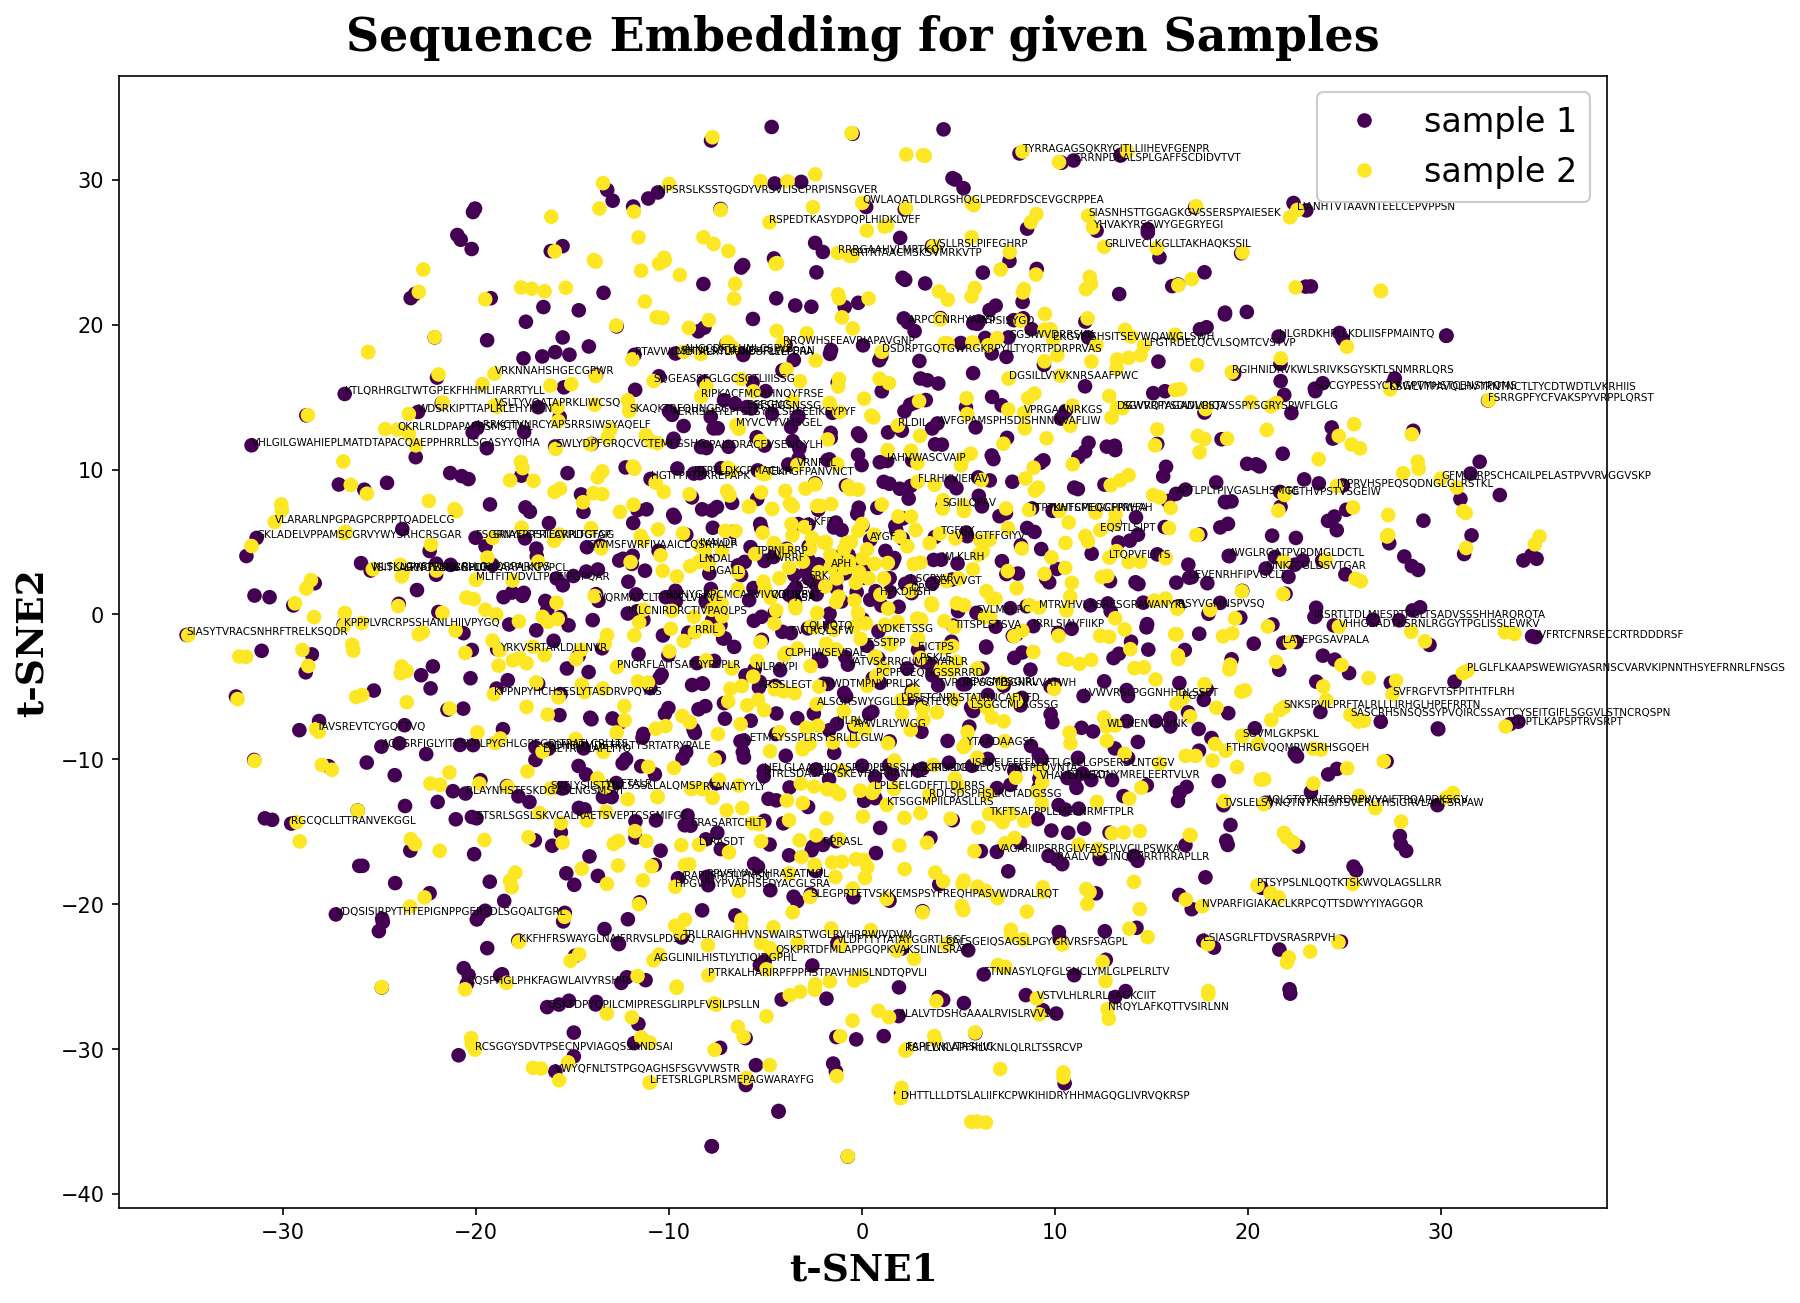

In [16]:
plot.embedding_tsne(["sample 1", "sample 2"]) # get an overview of how your sequences from different samples differ to each other
plot.ControlFigure.fig

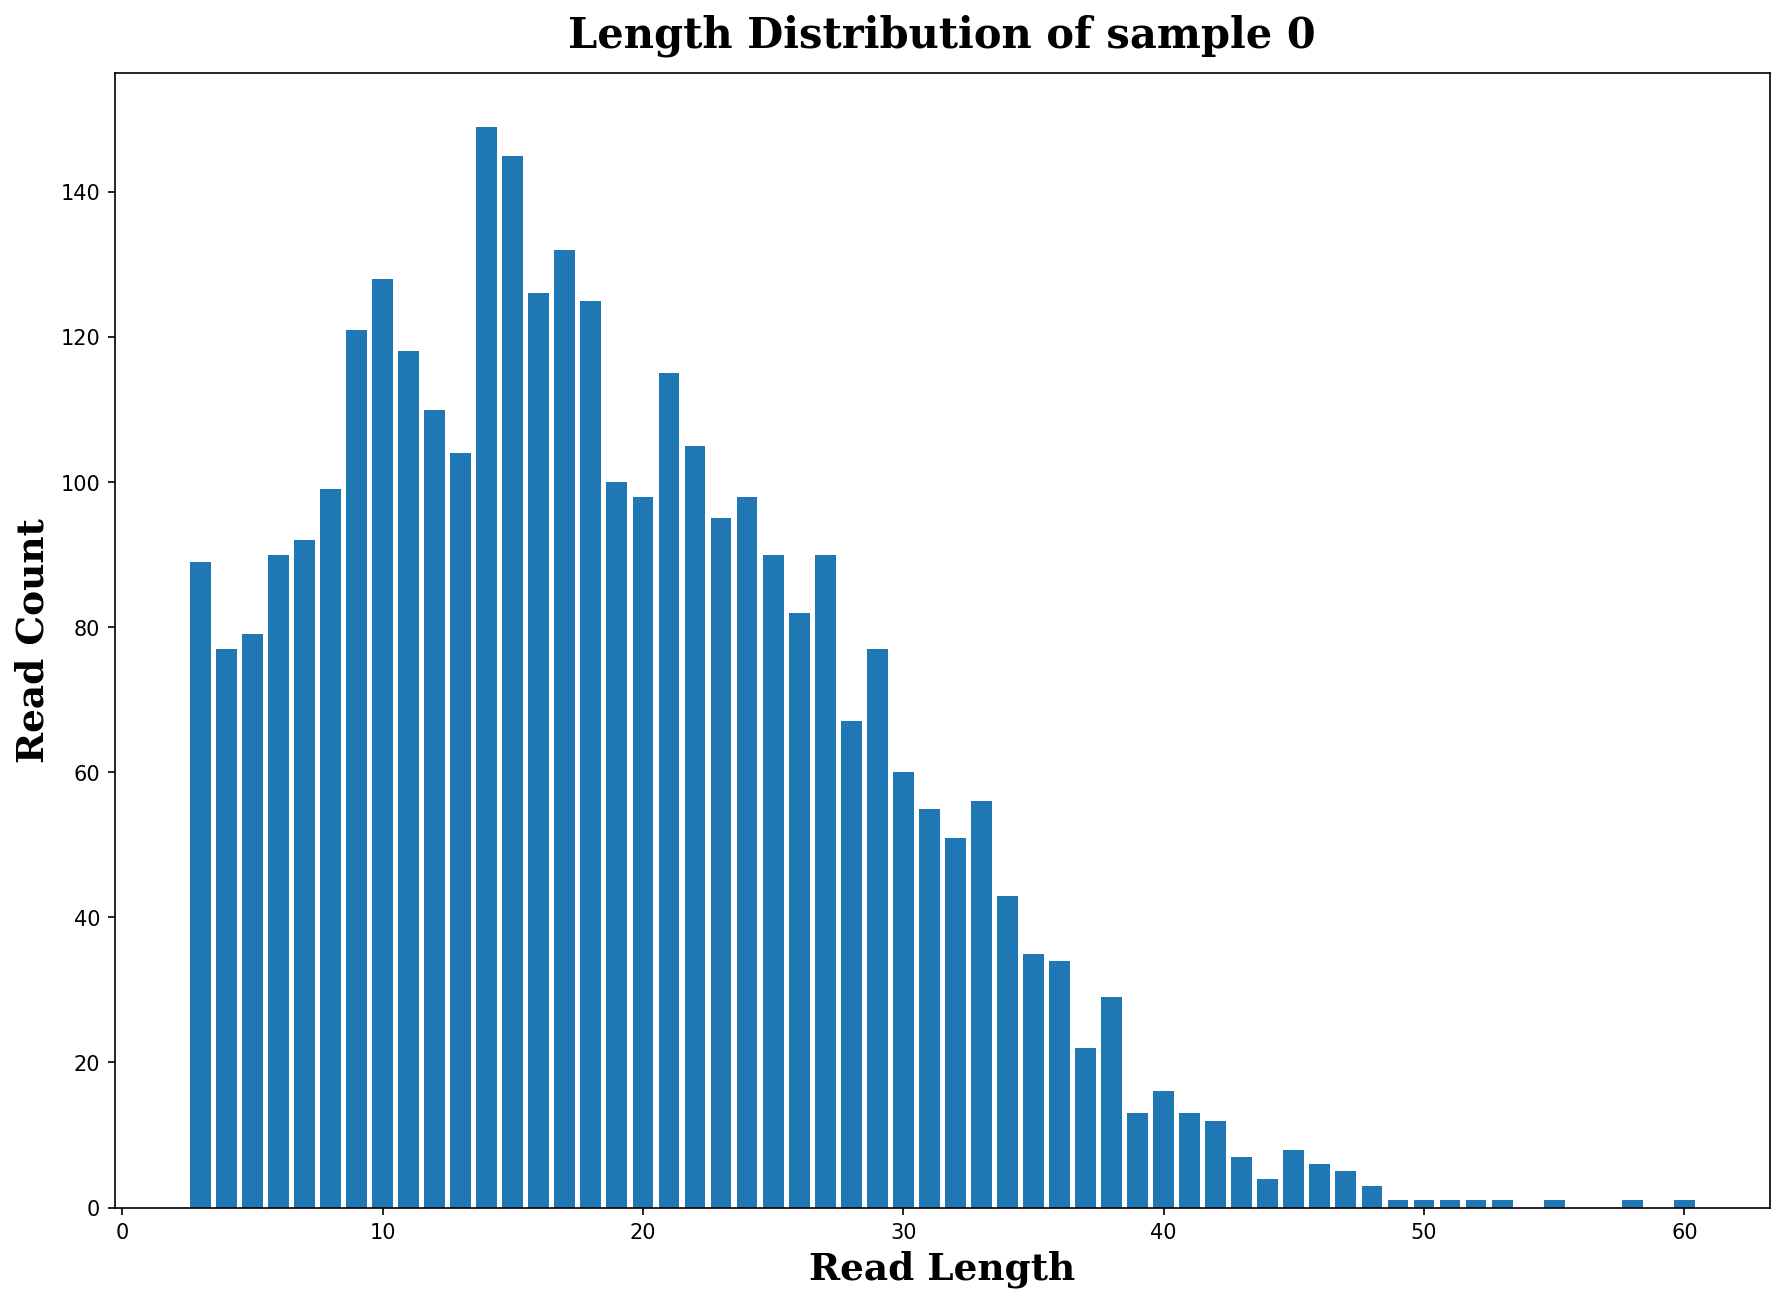

In [17]:
plot.lengthDistribution_single("sample 0")
plot.ControlFigure.fig

In [18]:
help(plot.lengthDistribution_multi)

Help on method lengthDistribution_multi in module src.ExpoSeq.pipeline:

lengthDistribution_multi(samples='all') method of src.ExpoSeq.pipeline.PlotManager instance
    :param samples: You analyze all samples per default. If you want to analyze specific samples it has to be a list with the corresponding sample names
    :return: Outputs one figure with one subplot per sample which shows you the distribution of the sequence length



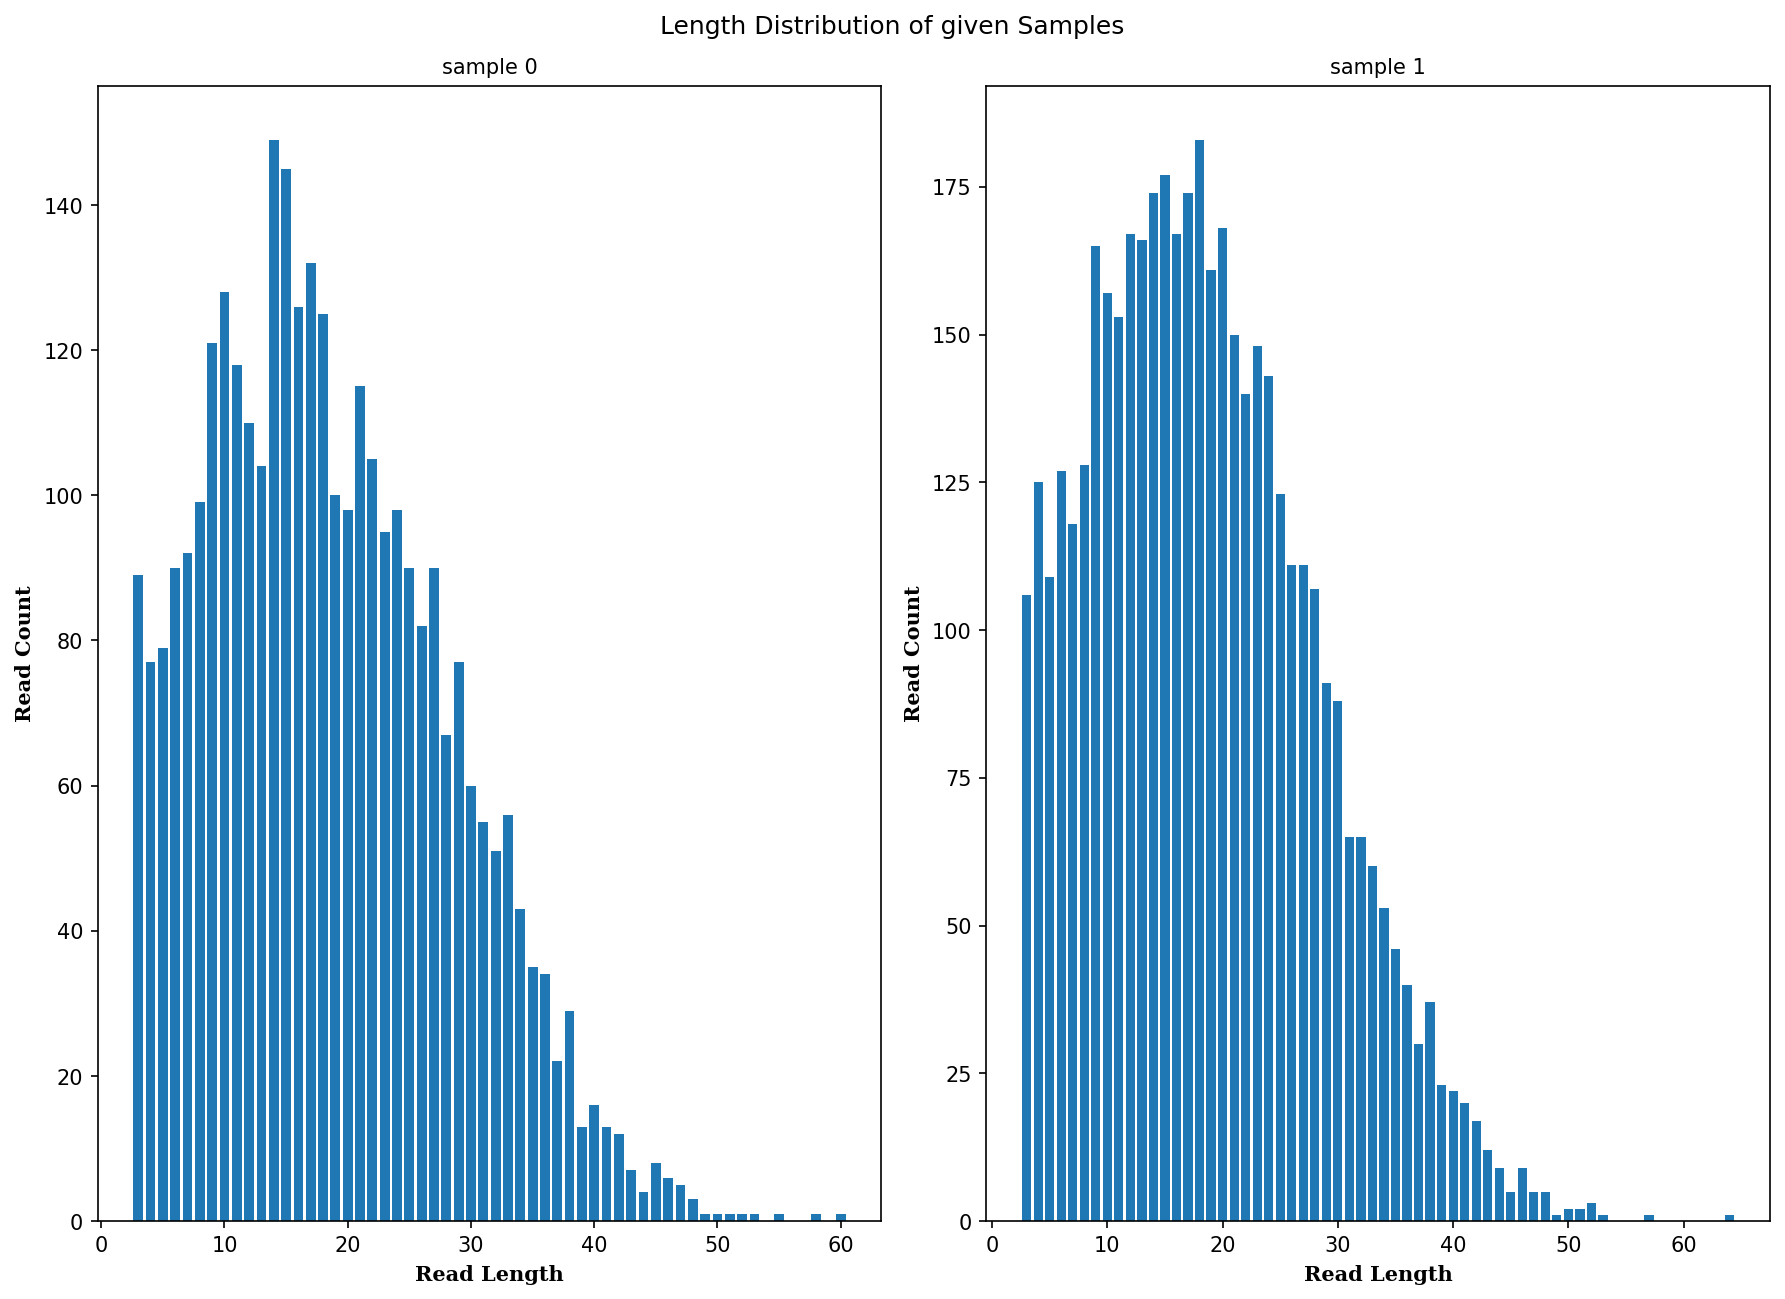

In [20]:
plot.lengthDistribution_multi(samples = ["sample 0", "sample 1"]) # change the number of columns if you prefer
plot.ControlFigure.fig

In [21]:
help(plot.rarefraction_curves)


Help on method rarefraction_curves in module src.ExpoSeq.pipeline:

rarefraction_curves(samples=None) method of src.ExpoSeq.pipeline.PlotManager instance
    :param samples: you insert a list which contains the sample names
    :return: Shows your the rarefraction curves for the given samples.



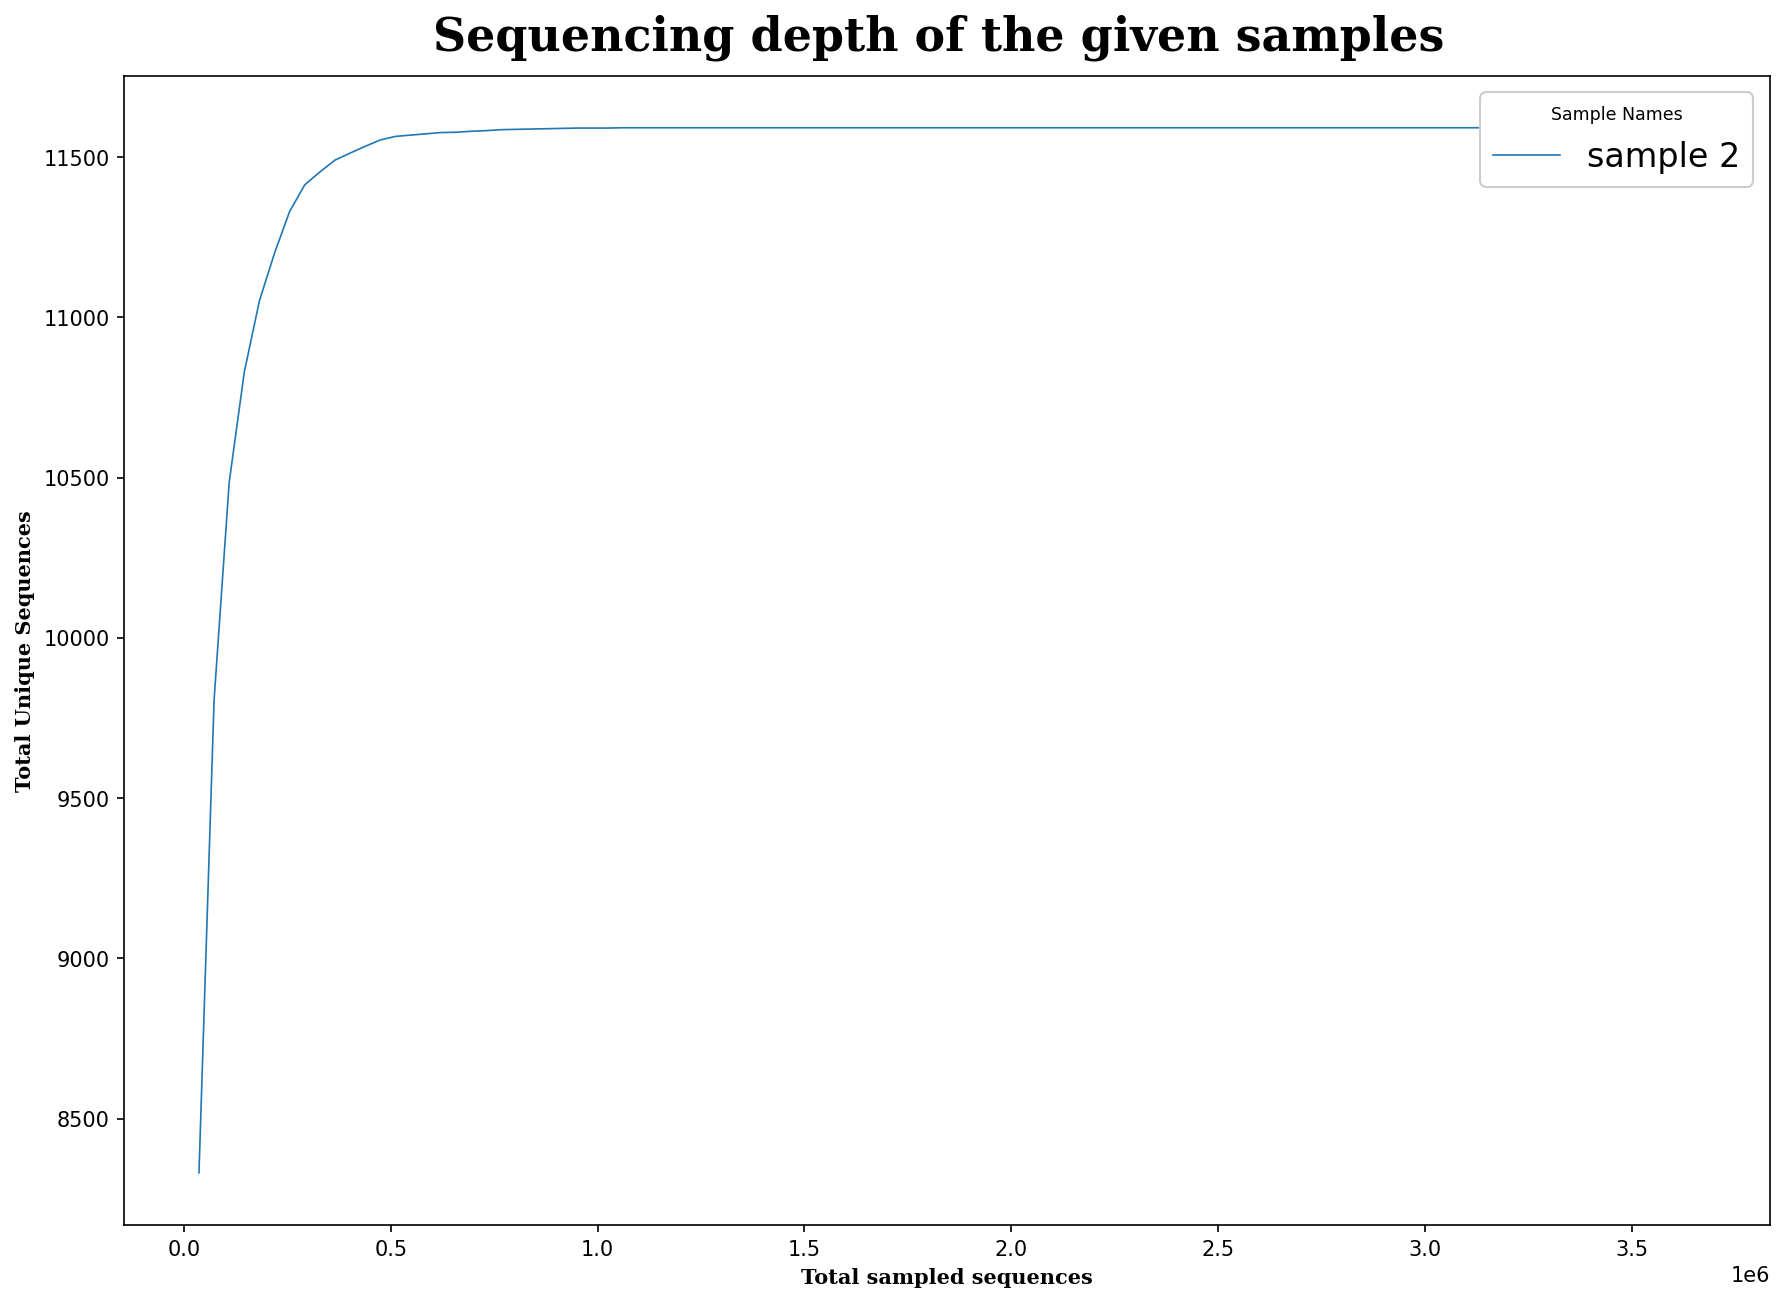

In [22]:
plot.rarefraction_curves(["sample 2"])
plot.ControlFigure.fig

In [23]:
help(plot.logoPlot_single)


Help on method logoPlot_single in module src.ExpoSeq.pipeline:

logoPlot_single(sample=None, highlight_specific_pos=False, method='proportion', chosen_seq_length=16) method of src.ExpoSeq.pipeline.PlotManager instance
    :param sample: insert the sample name
    :param highlight_specific_pos: optional. you can highlight a specific position. For instance if you want to highlight the 3rd position, you insert 3.
    :param method: You can specify whether you want to have on your y axis the frequency of the amino acids or the information content in bits. The default is proportion. If you want to have the information content, insert "bits"
    :param chosen_seq_length: 16 per default. You always analyze online one sequence length! You can change it if you would like to.
    :return: A logo Plot which shows you the composition of aminoacids per position



In [ ]:
plot.logoPlot_single("sample 0", chosen_seq_length = 10)
plot.ControlFigure.fig

In [ ]:
plot.logoPlot_multi(num_cols = 2, samples = ["sample 0", "sample 1"])
plot.ControlFigure.fig

In [25]:
help(plot.rel_seq_abundance)

Help on method rel_seq_abundance in module src.ExpoSeq.pipeline:

rel_seq_abundance(samples=None, max_levenshtein_distance=0, length_filter=0, batch=3000) method of src.ExpoSeq.pipeline.PlotManager instance
    :param samples: For a qualitative analysis choose samples from the same panning experiment. Input is a list
    :param max_levenshtein_distance: Default is 0. You can change it to see increased fraction with increased variability of certain sequences
    :param length_filter: Default is 0. You should change it if you change the levenshtein distance. Otherwise your results will be biased.
    :param batch: Default is 3000. The size of the sample which is chosen. The higher it is, the more computational intense.
    :return: Shows you a bar plot of the frequencies of the most abundant sequences. You can introduce the levenshtein distance to see how the frequency changes with higher variability of the sequences.



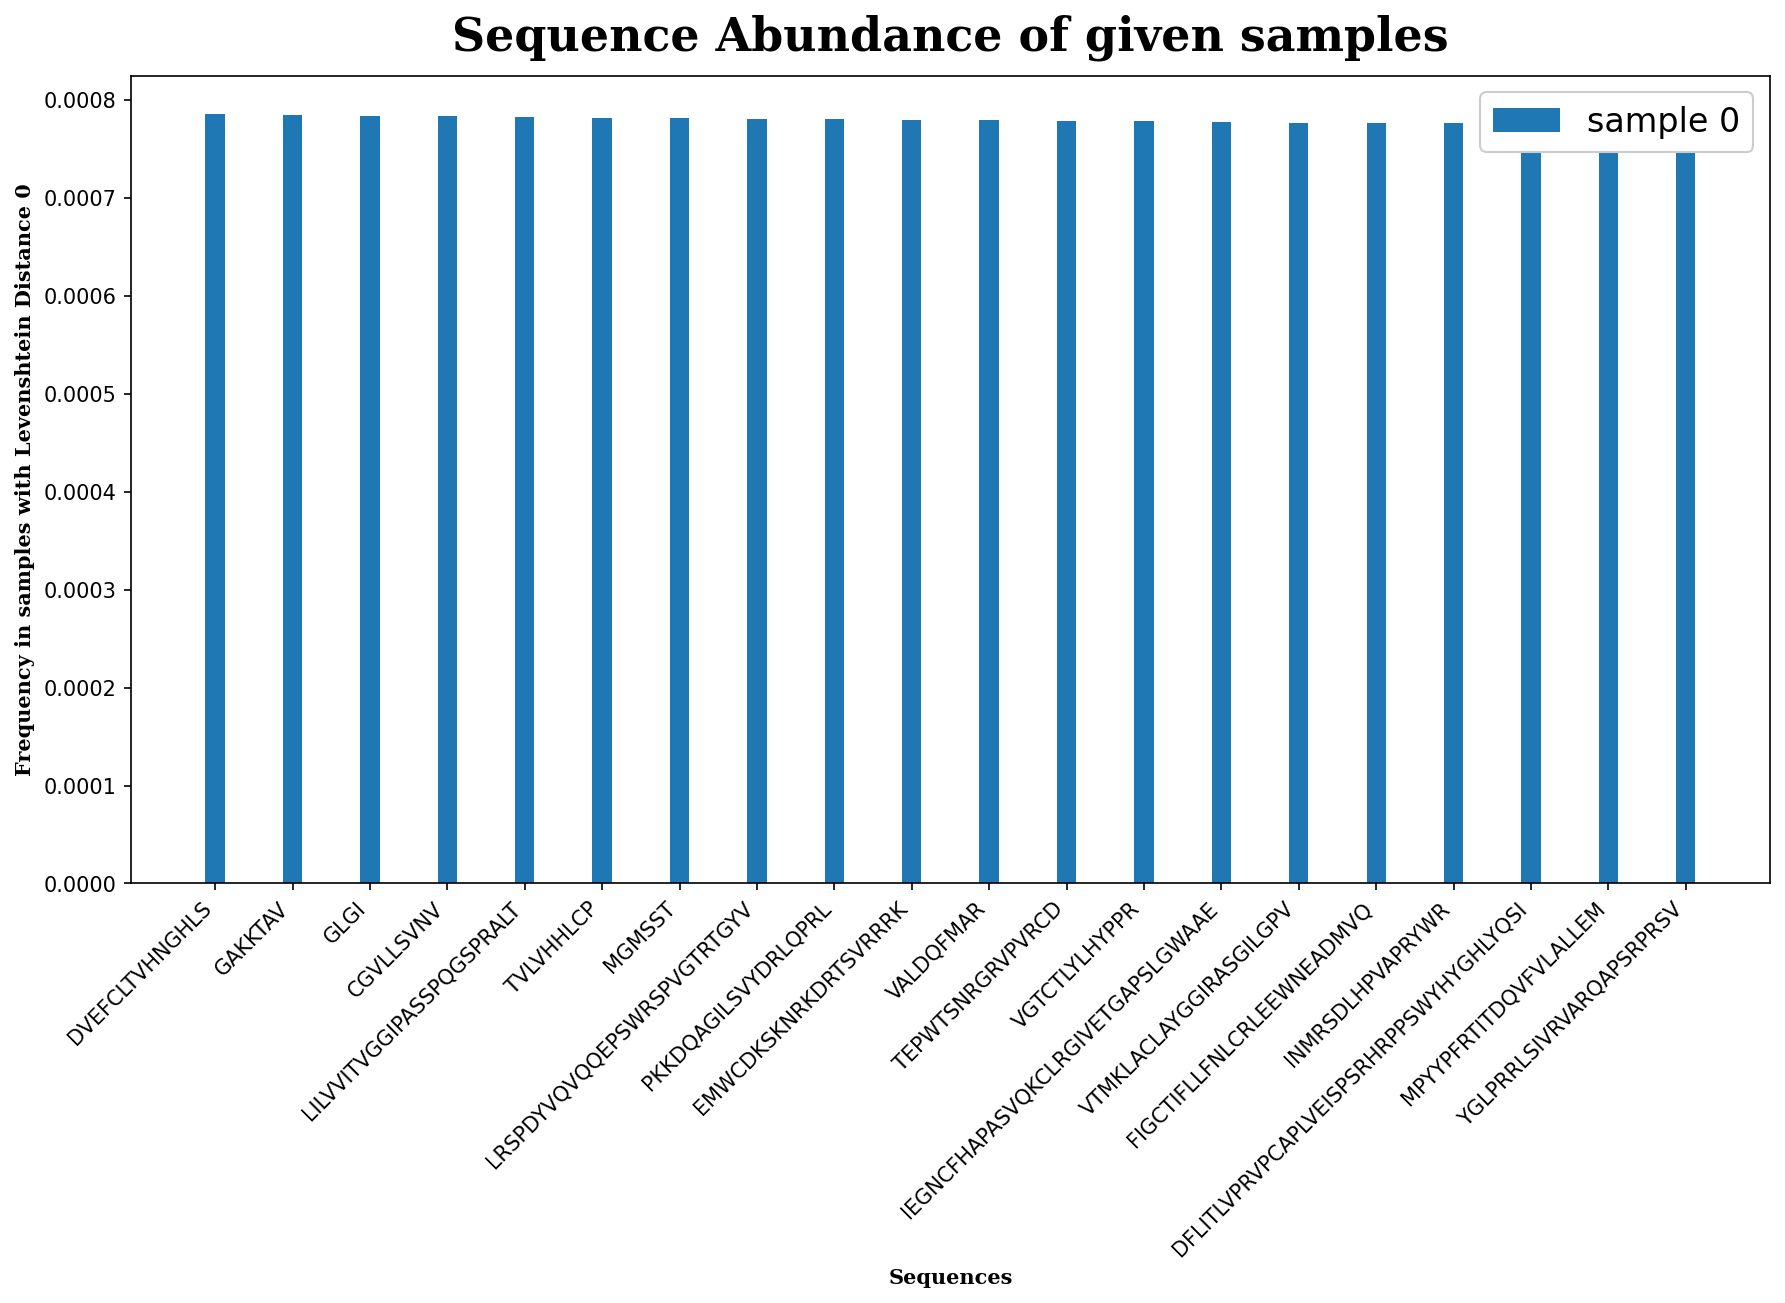

In [26]:
plot.rel_seq_abundance(["sample 0"]
                       )
plot.ControlFigure.fig

In [27]:
help(plot.cluster_one_AG)

Help on method cluster_one_AG in module src.ExpoSeq.pipeline:

cluster_one_AG(antigen=None, max_ld=1, min_ld=0, batch_size=1000, specific_experiments=False, preferred_cmap='Blues', label_type='numbers', save_report_path=None) method of src.ExpoSeq.pipeline.PlotManager instance
    :param antigen: is the name of the antigen you would like to analyze
    :param max_ld: optional Parameter where its default is 1. Is the maximum Levenshtein distance you allow per cluster
    :param min_ld: optional Parameter where its default is 0. Is the minimum Levenshtein distance between sequences you allow
    :param batch_size: optional Parameter where its default is 1000. Is the batch size you want to use for the analysis
    :param specific_experiments: optional Parameter. You can give the names of specific samples in a list if you want
    :param preferred_cmap: optional Parameter. Define the colormap you would like to use.
    :param save_report_path: Default is None which saves your report in my_

0.0
0.0


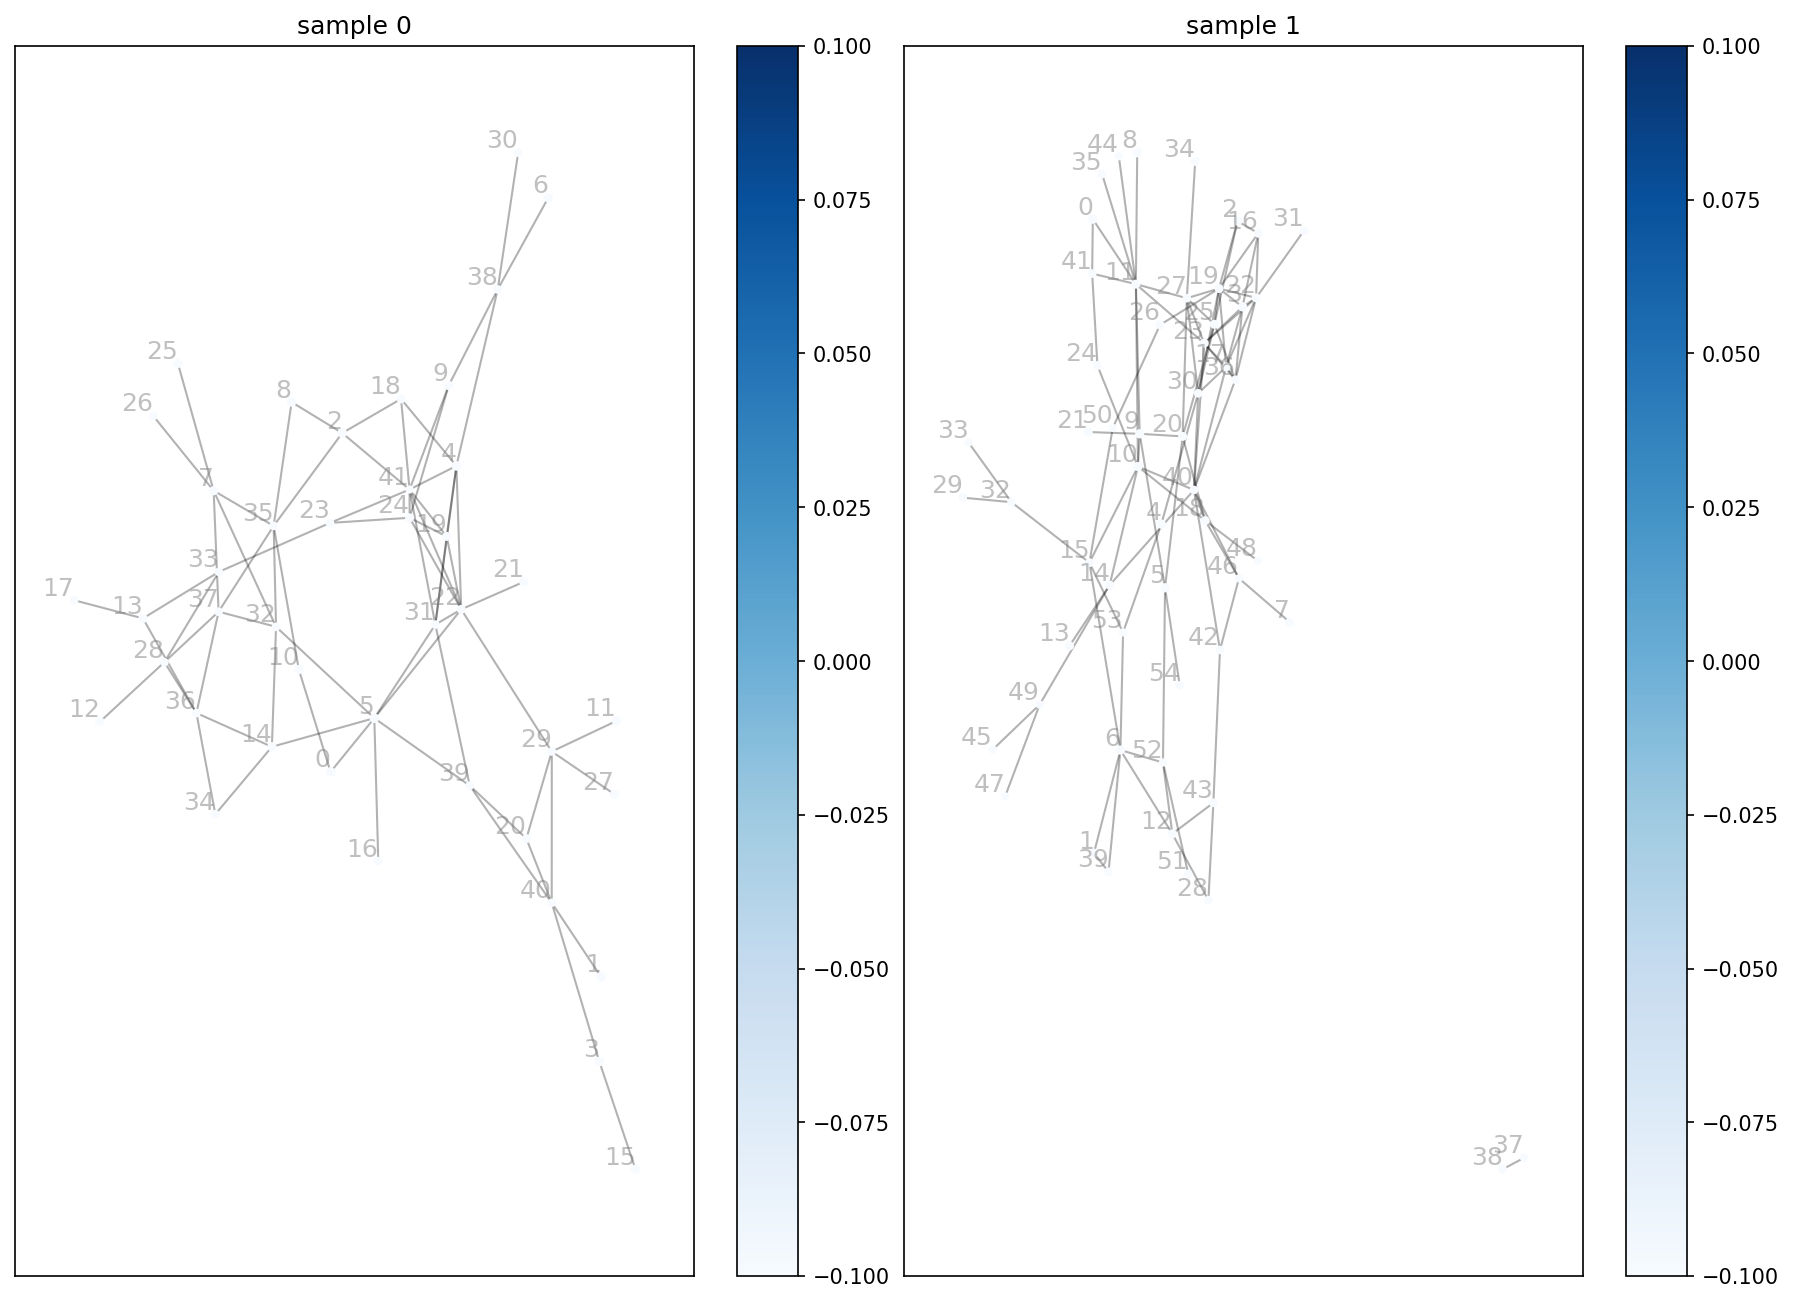

In [28]:
plot.cluster_one_AG("Epitope 0",max_ld = 2, specific_experiments=["sample 0", "sample 1"])
plot.ControlFigure.fig
# Look at the colorbar: It does not have a clear scale. That is because there are no matches between the binding data and the sequences. 

In [29]:
help(plot.basic_cluster)

Help on method basic_cluster in module src.ExpoSeq.pipeline:

basic_cluster(samples=None, batch_size=1000, max_ld=1, min_ld=0, second_figure=False, label_type='numbers', save_report_path=None) method of src.ExpoSeq.pipeline.PlotManager instance
    :param samples: A list containing the samples you would like to analyze. Analyze just one sample with: ["My_sampel_name"].
    :param max_ld: Maximum allowed levenshtein distance between sequences within one cluster. The higher the distance the larger the clusters.
    :param min_ld: Minimum allowed levenshtein distance between sequences within one cluster.
    :param second_figure: Default is False. Creates a second figure with the levenshtein distance as bars
    :param label_type: Default is numbers. This will label the nodes in the plot with the corresponding identifier in the output report. You can type sequences for labeling the nodes with the sequneces. If you do not want to have labels set it to None.
    :param save_report_path: Def

Graph with 1000 nodes and 5 edges


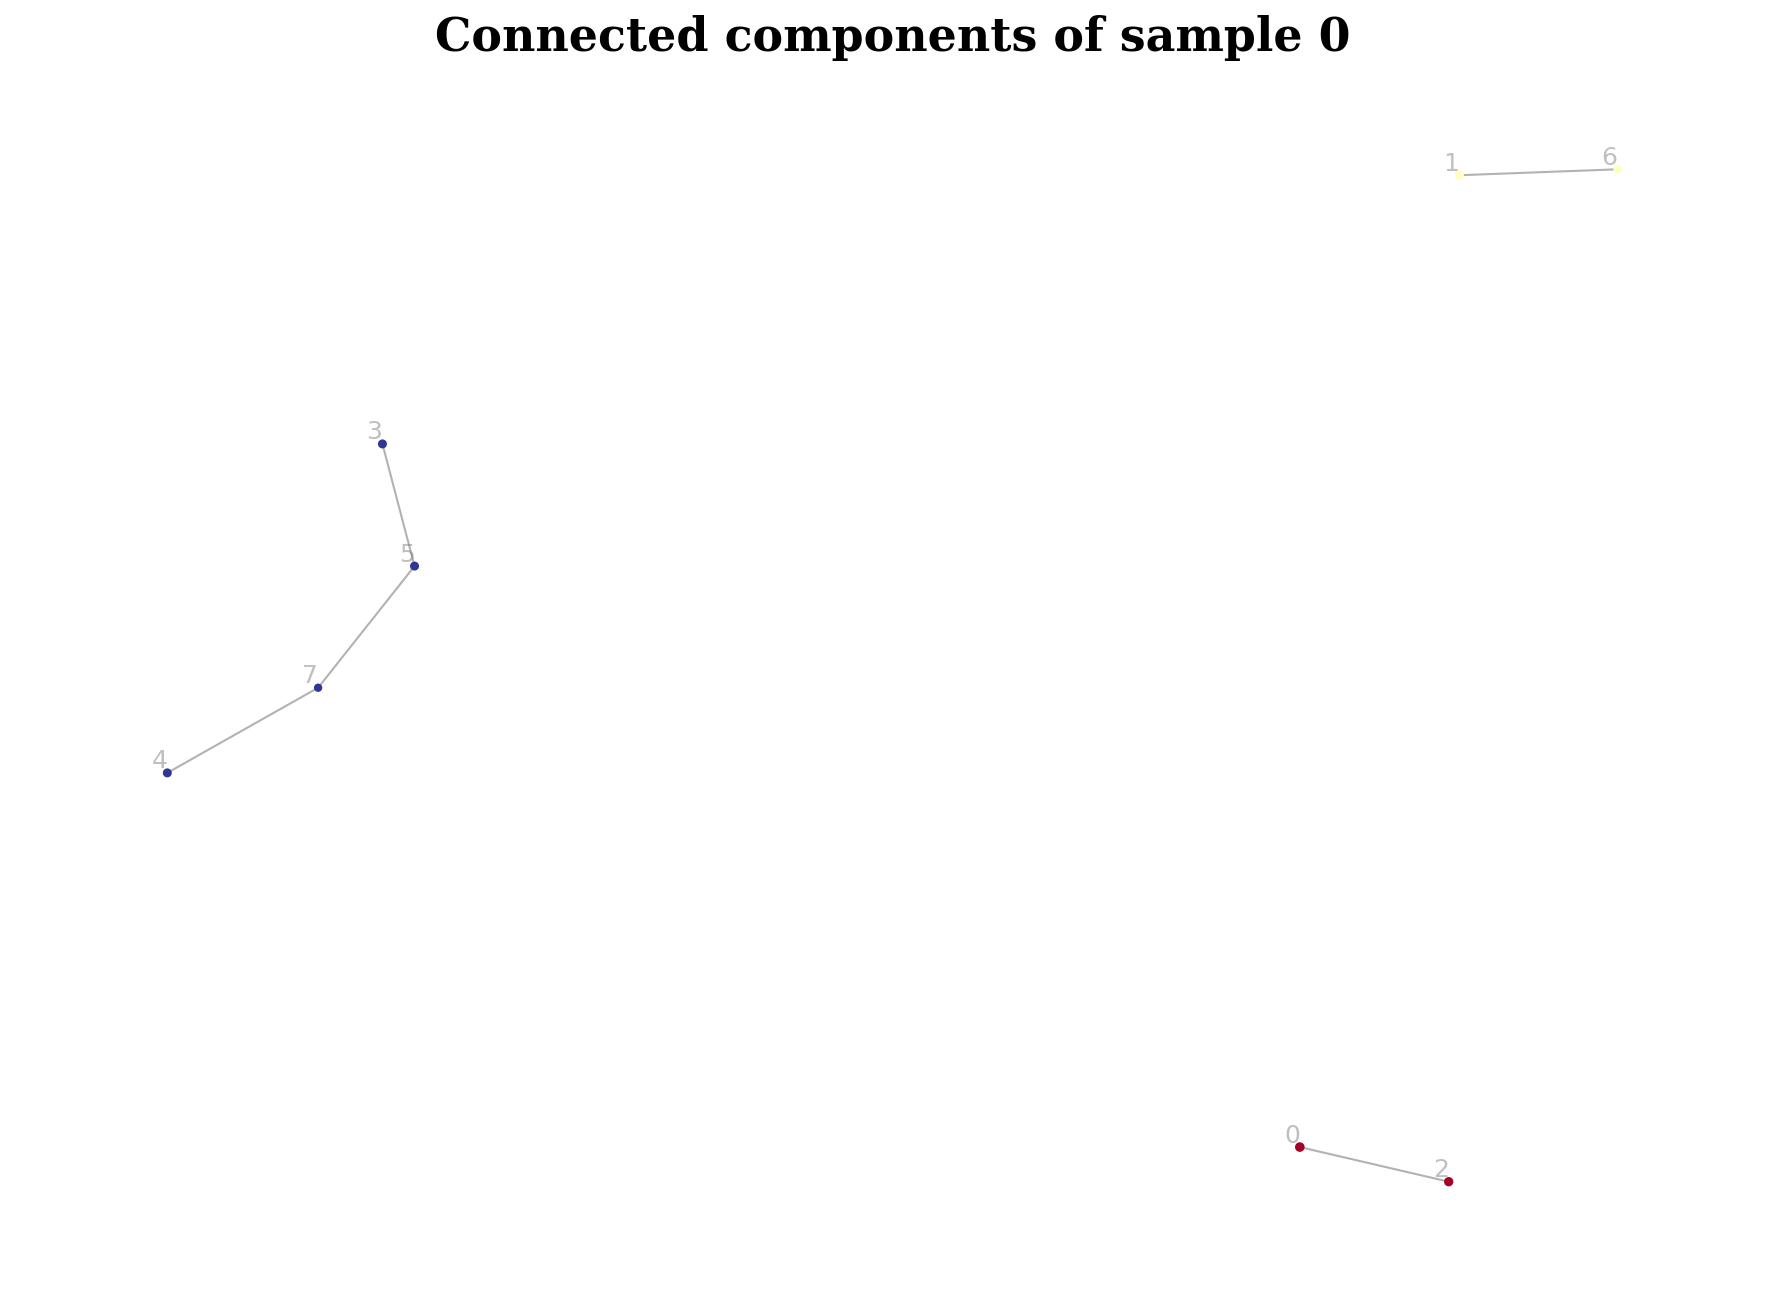

In [33]:
plot.basic_cluster(["sample 0"])
plot.ControlFigure.fig
# in normal cases you would have much more connected components


In [34]:
help(plot.aa_distribution)

Help on method aa_distribution in module src.ExpoSeq.pipeline:

aa_distribution(sample=None, region=[3, 7], protein=True) method of src.ExpoSeq.pipeline.PlotManager instance
    :param sample: The sample you would like to analyze
    :param region: The input is a list and you can specify with the first value the beginning region and with the second value the end region within your sequences for which you want to know the amino acid composition. For instance: [3,7]
    :param protein: Default True. If you would like to analyze nucleotide sequences, set it to False
    :return: Returns a plot which shows the amino acid distribution in the given sequence range.



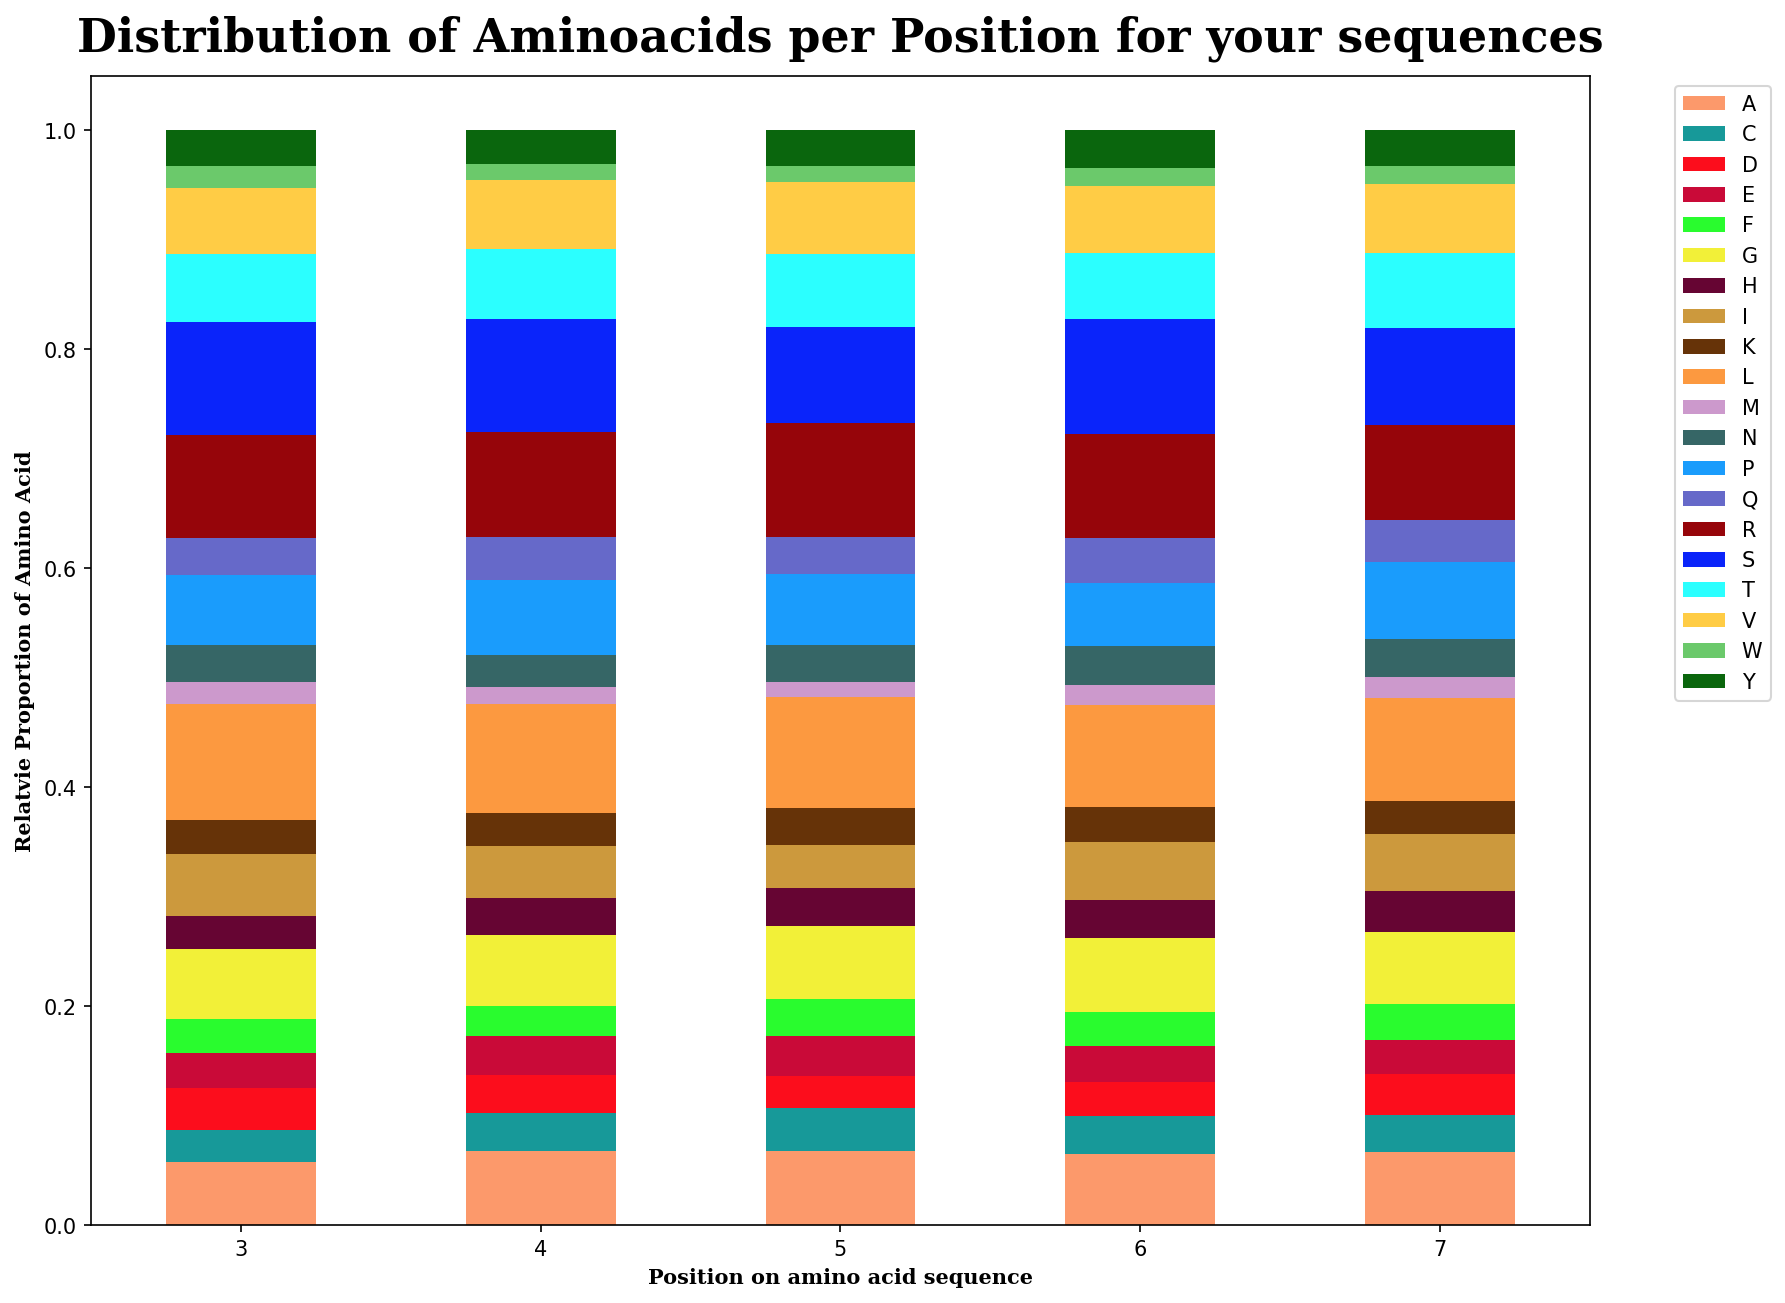

In [35]:
plot.aa_distribution("sample 0", [3,7])
plot.ControlFigure.fig
import matplotlib.pyplot as plt
plt.tight_layout()
plot.ControlFigure.fig

In [36]:
help(plot.change_experiment_names)

Help on method change_experiment_names in module src.ExpoSeq.pipeline:

change_experiment_names(specific=None, change_whole_dic=False) method of src.ExpoSeq.pipeline.PlotManager instance
    :param specific: optional parameter. You can use this function to change the names of a specific sample.
    :param change_whole_dic: optional Parameter. The renaming can be done by using a dictionary and map it to the labels. You can change multiple or all labels by adding the new dictionary for this parameter.
    :return:You can use this function to change the name of your samples. Thus, you can change the labels of your plots.



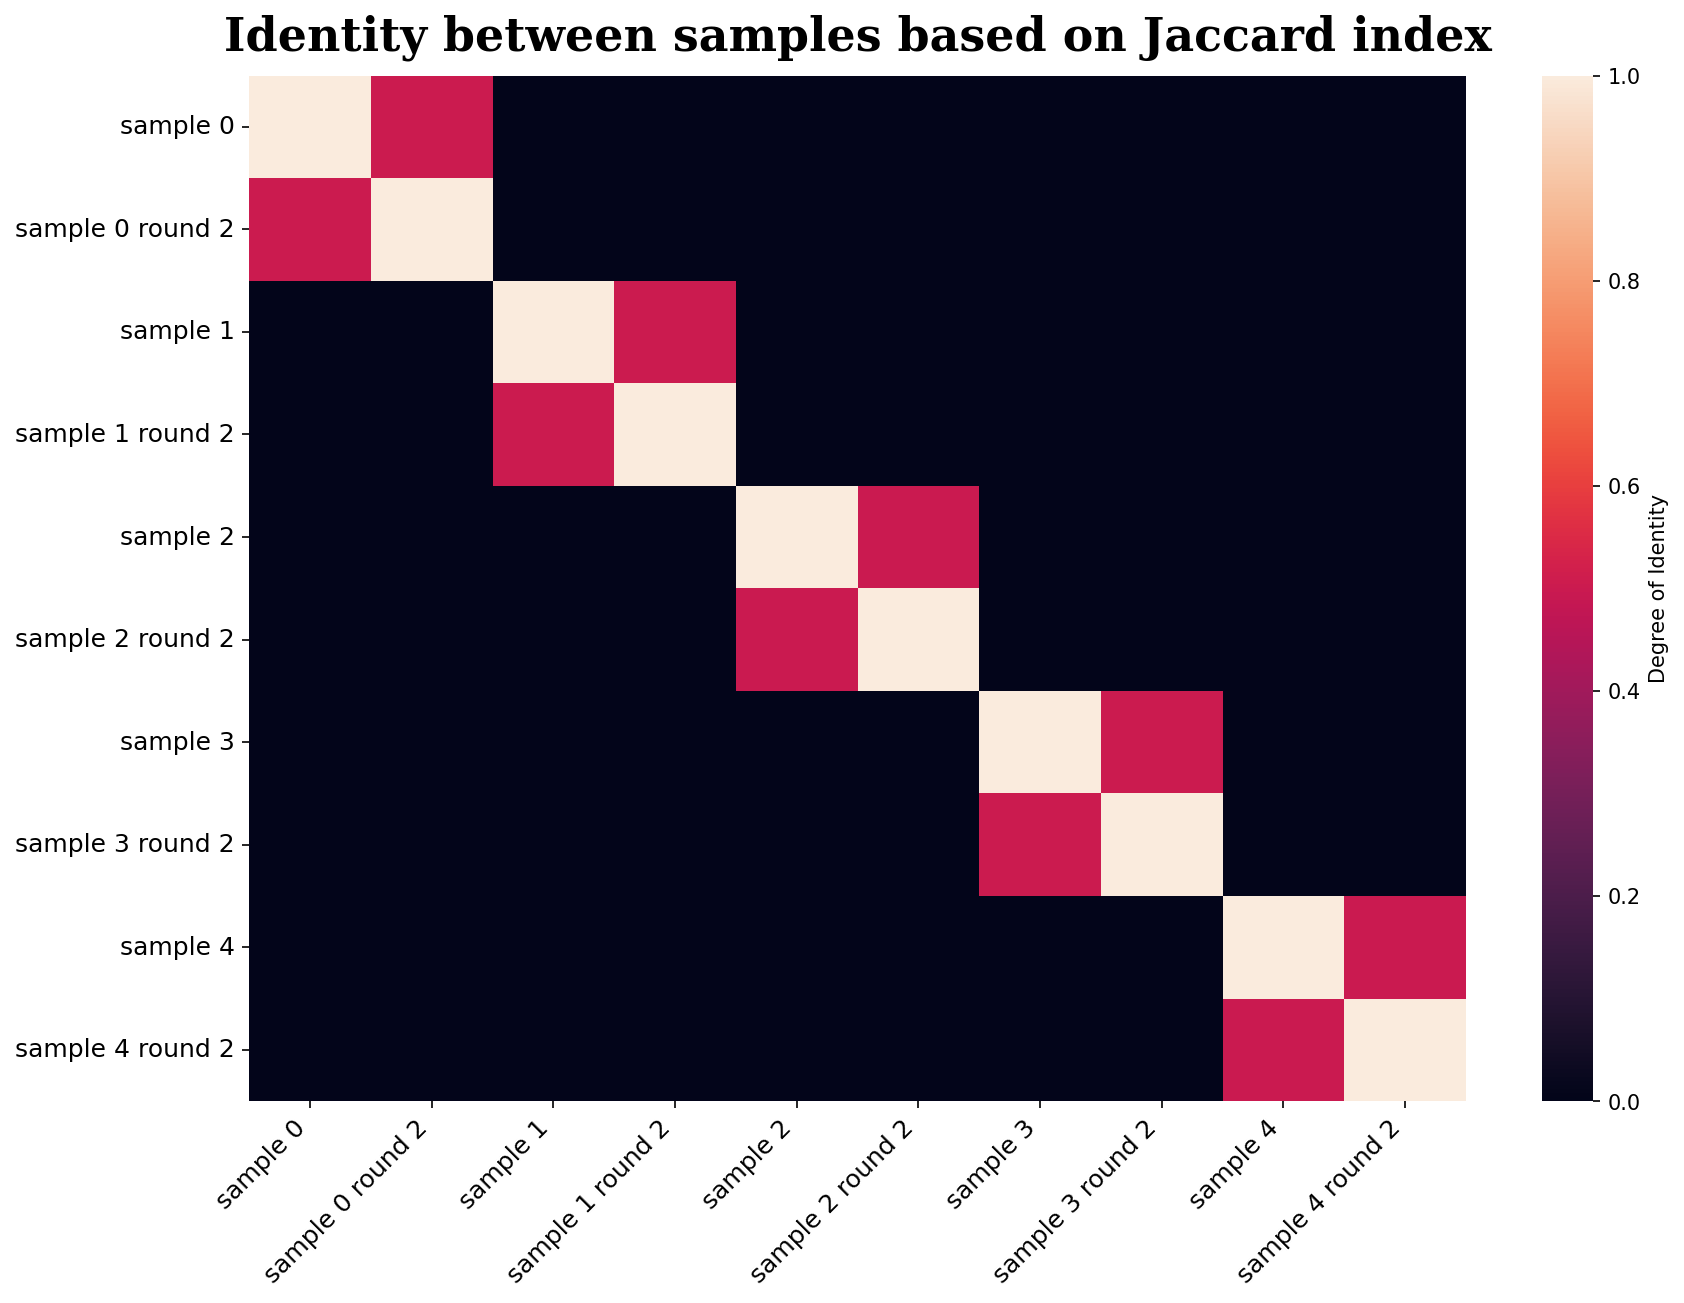

: 

In [37]:
plot.jaccard()
plot.ControlFigure.fig